## Introduction:
    An existential problem for any Loan providers today is to find out the Loan applicants who are very likely to repay the
    loan. This way companies can avoid losses and incur huge profits.
    Home Credit offers easy, simple and fast loans for a range of Home Appliances, Mobile Phones, Laptops, Two Wheeler's,
    and varied personal needs. Home Credit comes up with a Kaggle challenge to find out the loan applicants who is 
    capable of repaying a loan, given the applicant data, all credits data from Credit Bureau, previous applications data 
    from Home Credit and some more data.

## Problem statement:
    Building a model to predict how capable each applicant is of repaying a loan, so that sanctioning loan only for 
    the applicants who are likely to repay the loan.
    


# List of Contents

## 1.Dataset Description
## 2. EDA
## 3. Feature Engineering
## 4. Data Preparation
## 5. Machine Learning Modelling
## 6. Performance Metrics
## 7. Conclusion

### Dataset Description
#### application_train.csv
    1. This dataset consists of 307511 rows and 122 columns.
    2. Each row has unique id ‘SK_ID_CURR’ and the output label is in the ‘TARGET’ column.
    3. TARGET indicating 0: the loan was repaid or 1: the loan was not repaid.
    
#### bureau.csv
    1. All client’s previous credits provided by other financial institutions that were reported to Credit Bureau 
    (for clients who have a loan in our sample).
    2. For every loan in our sample, there are as many rows as the number of credits the client had in the Credit Bureau 
    before the application date.
    
#### bureau_balance.csv
    1. Monthly balances of previous credits in Credit Bureau.
    2. This table has one row for each month of history of every previous credit reported to Credit Bureau — i.e. the table 
    has (#loans in sample * # of relative previous credits * # of months where we have some history observable for 
    the previous credits) rows.
    
#### previous_application.csv
    1. All previous applications for Home Credit loans of clients who have loans in our sample.
    2. There is one row for each previous application related to loans in our data sample.
    
#### POS_CASH_balance.csv
    1. Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
    2. This table has one row for each month of history of every previous credit in Home Credit (consumer credit and 
    cash loans) related to loans in our sample — i.e. the table has (#loans in sample * # of relative previous credits 
    * # of months in which we have some history observable for the previous credits) rows.
    
#### installments_payments.csv
    1. Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
    2. There is a) one row for every payment that was made plus b) one row each for a missed payment.
    3. One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one 
    previous Home Credit credit related to loans in our sample.
    
#### credit_card_balance.csv
    1. Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
    2.This table has one row for each month of history of every previous credit in Home Credit (consumer credit and 
    cash loans) related to loans in our sample — i.e. the table has (#loans in sample * # of relative previous credit cards 
    * # of months where we have some history observable for the previous credit card) rows.


In [1]:
#importing basic libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### Exploration of Applications Data 

In [2]:
app=pd.read_csv('application_train.csv')
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#brief information about application data
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


From the above result we can see that, there are 16 categorical variables and 106 numerical variables and totally 307511 entries

In [4]:
#description of the application data
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


From the above table we will get know about data featurewise with min, max, quantiles,mean etc.

#### Identifying Missing Value Present in Application Train Dataset

In [5]:

count=app.isnull().sum().sort_values(ascending=False)
percentage=((app.isnull().sum()/len(app))*100).sort_values(ascending=False)

missing_appl=pd.concat([count,percentage],keys=['counts','percentage'],axis=1)
missing_appl.head(30)

,counts,percentage
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


There are lot of missing values in the data we need to take care of those

#### Function for finding Numerical and categeical Variables

In [6]:
def type_features(data):
    cat_features = data.select_dtypes(include = ["object"]).columns
    num_features = data.select_dtypes(exclude = ["object"]).columns
    print( "categorical_features :",list(cat_features))
    print()
    print("numerical_features:",list(num_features))

In [7]:
#finding types of features in application data
type_features(app)

categorical_features : ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

numerical_features: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_

#### Distribution of Target Variable 

<AxesSubplot:xlabel='TARGET', ylabel='count'>

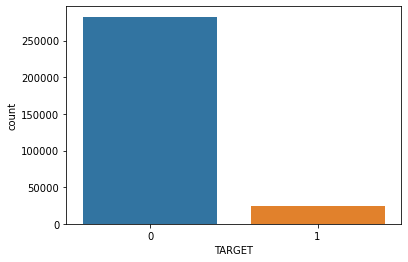

In [8]:
sns.countplot(app.TARGET)

The target variable is imbalance with the majority of loans has the target equals to 0 which indicates that applicant had no issues in repaying the loan. There are about 280000 loans applications with target = 0, While only 25000 loan applicants having problems in repaying the loan.

In [9]:
#checking each target counts
app['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [10]:
app.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Since there are more than 2 categories in some features, So we have to use both Label Encoder and One hot Encoding.

## EDA

In [11]:
#Assigning value to target variables to get clear understanding of data distribution, (just for EDA)
risk=app.assign(target=app.TARGET.map({0: "Repaid", 1: "Not Repaid"}))
risk

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,target
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Not Repaid
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Repaid
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Repaid
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Repaid
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Repaid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Repaid
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Repaid
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,Repaid
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Not Repaid


#### Analysis of Categorical features for data visualization

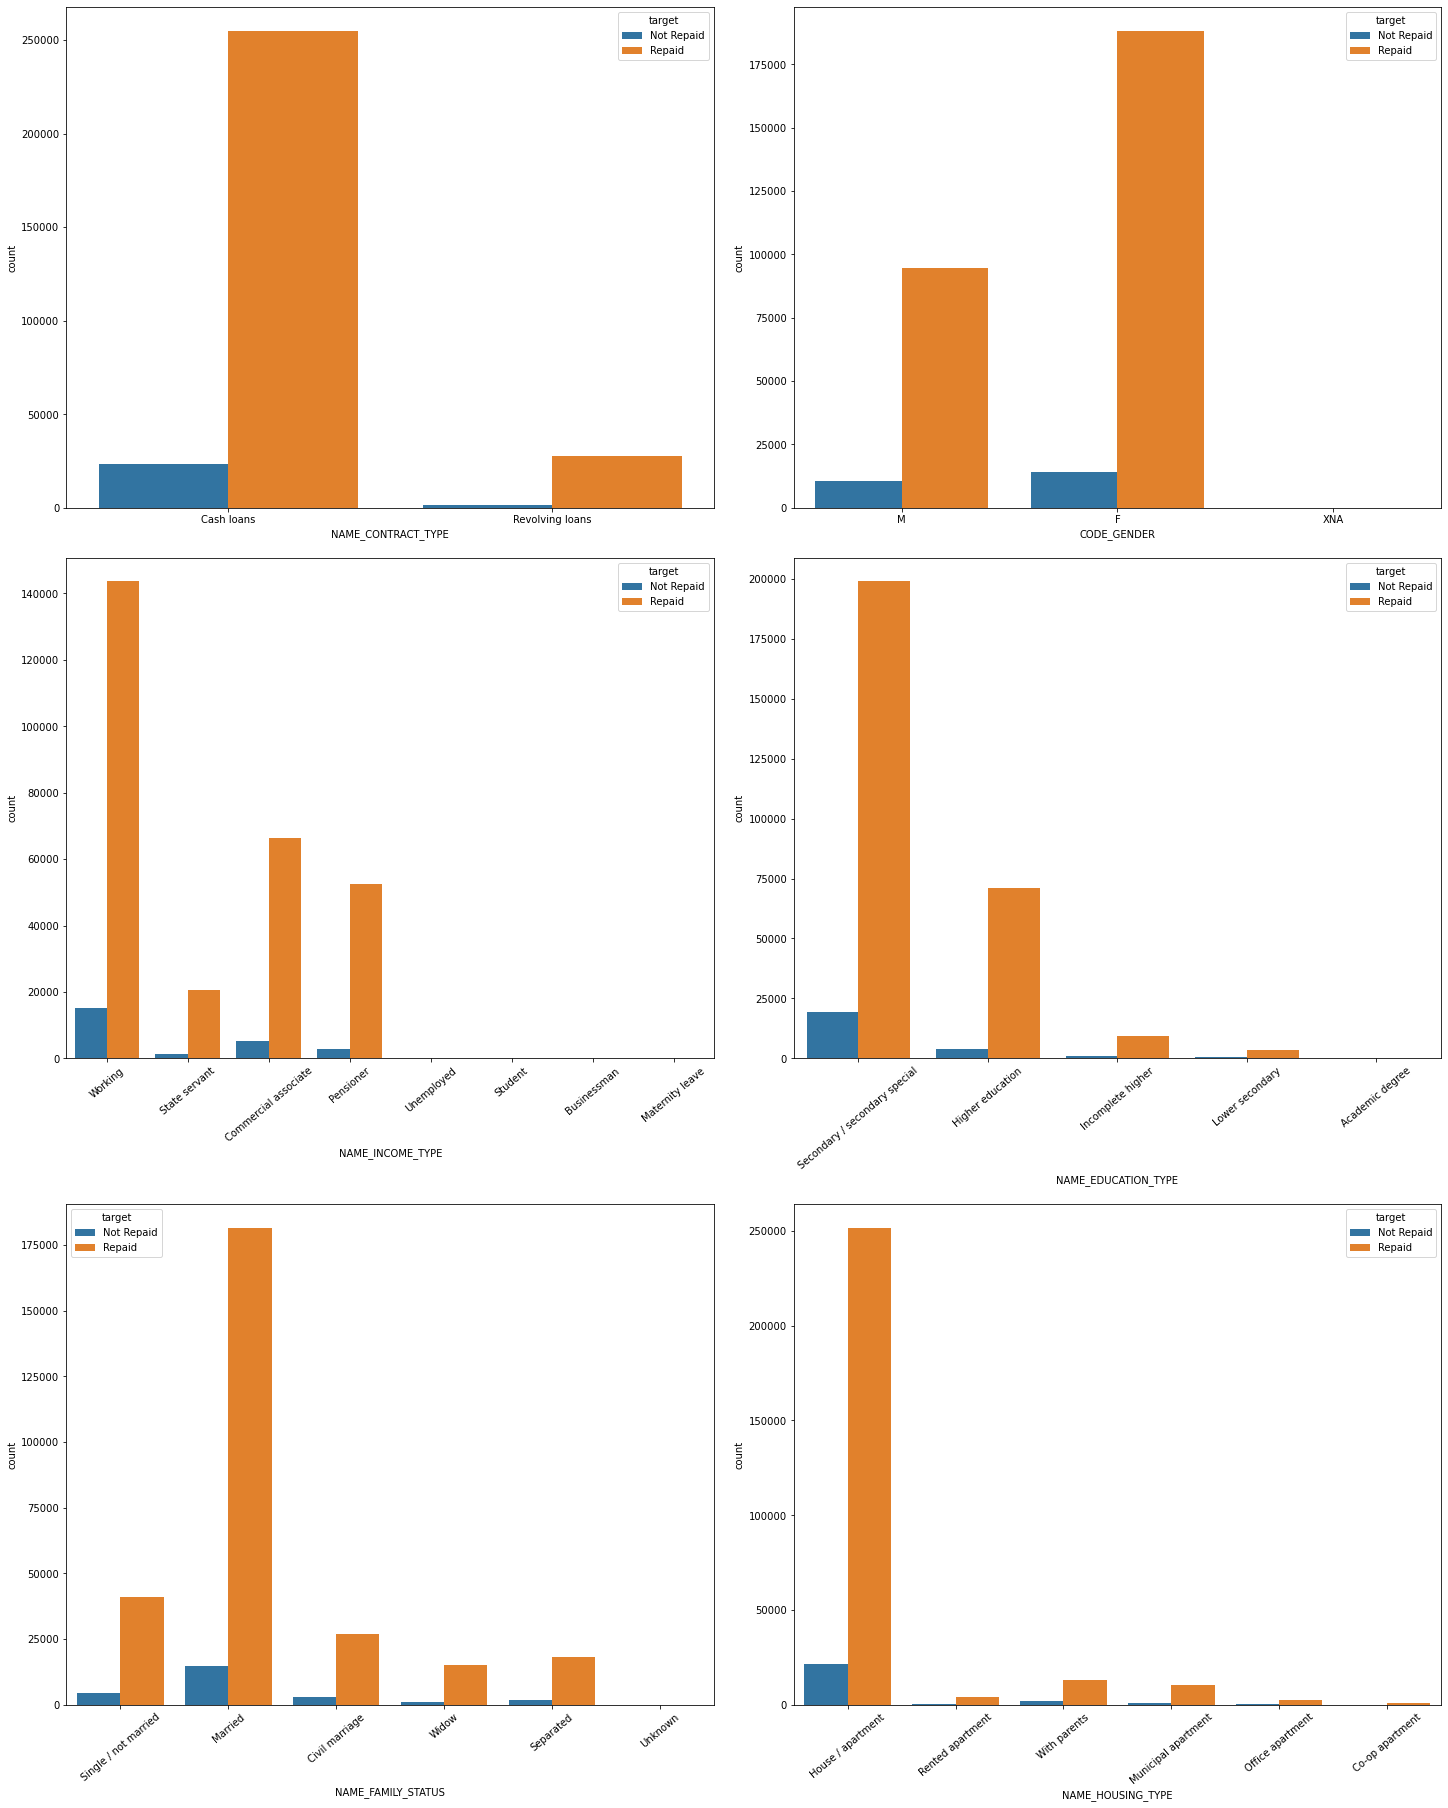

In [12]:

fig,axes =  plt.subplots(3,2,figsize=(20,25),constrained_layout=True)
sns.countplot(risk.NAME_CONTRACT_TYPE,hue=risk.target,ax=axes[0][0])
sns.countplot(risk.CODE_GENDER,hue=risk.target,ax=axes[0][1])
b=sns.countplot(risk.NAME_INCOME_TYPE,hue=risk.target,ax=axes[1][0])
b.set_xticklabels(b.get_xticklabels(), rotation=40)
c=sns.countplot(risk.NAME_EDUCATION_TYPE,hue=risk.target,ax=axes[1][1])
c.set_xticklabels(c.get_xticklabels(), rotation=40)
f=sns.countplot(risk.NAME_FAMILY_STATUS,hue=risk.target,ax=axes[2][0])
f.set_xticklabels(f.get_xticklabels(), rotation=40)
g=sns.countplot(risk.NAME_HOUSING_TYPE,hue=risk.target,ax=axes[2][1])
g.set_xticklabels(g.get_xticklabels(), rotation=40)
plt.show()

* Its clear that by looking at the above given plot based on Contract type, customer with cash loans has high count where not able to pay loan back compare to other.
* Its clear that by looking at the above given plot  on code gender type female has high count where not able to pay loan back compare to male.
* Its clear that by looking at the above given plot based on code income type, working type has high count where not able to pay loan back compare to all other
* Its clear that by looking at the above given plot based on education type, with education of secondary/secondary special has high count where not able to pay loan back.
* Its clear that by looking at the above given plot based on code Family type, where Married customer has high count are not able to pay loan back compare to all other type status.
* Its clear that by looking at the above given plot based on Housing type and the house type customer has high count where not able to pay loan back compare to all other.


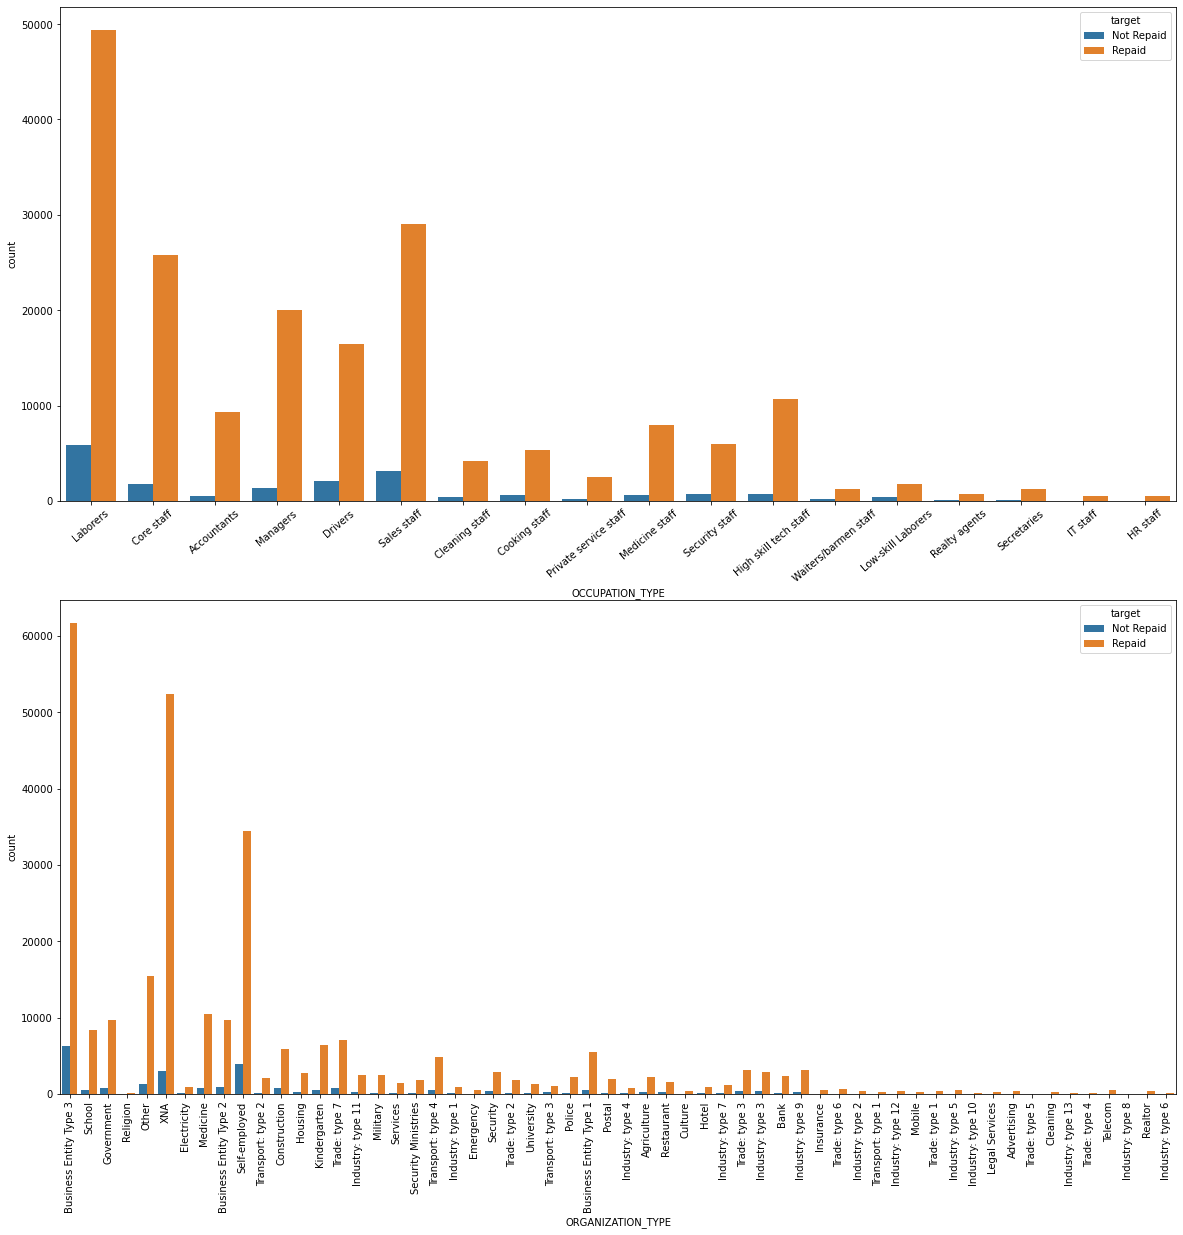

In [13]:

fig,axes =  plt.subplots(2,1,figsize=(20,20))
d=sns.countplot(risk.OCCUPATION_TYPE,hue=risk.target,ax=axes[0])
d.set_xticklabels(d.get_xticklabels(), rotation=40)
e=sns.countplot(risk.ORGANIZATION_TYPE,hue=risk.target,ax=axes[1])
e.set_xticklabels(e.get_xticklabels(), rotation=90)
plt.show()

* Its clear that by looking at the above given plot based on occupation type, the working has high count where not able to pay loan back compare to all other.

* Its clear that by looking at the above given plot based on Organization type, the Business type 3 customer has high count where not able to pay loan back compare to all other.

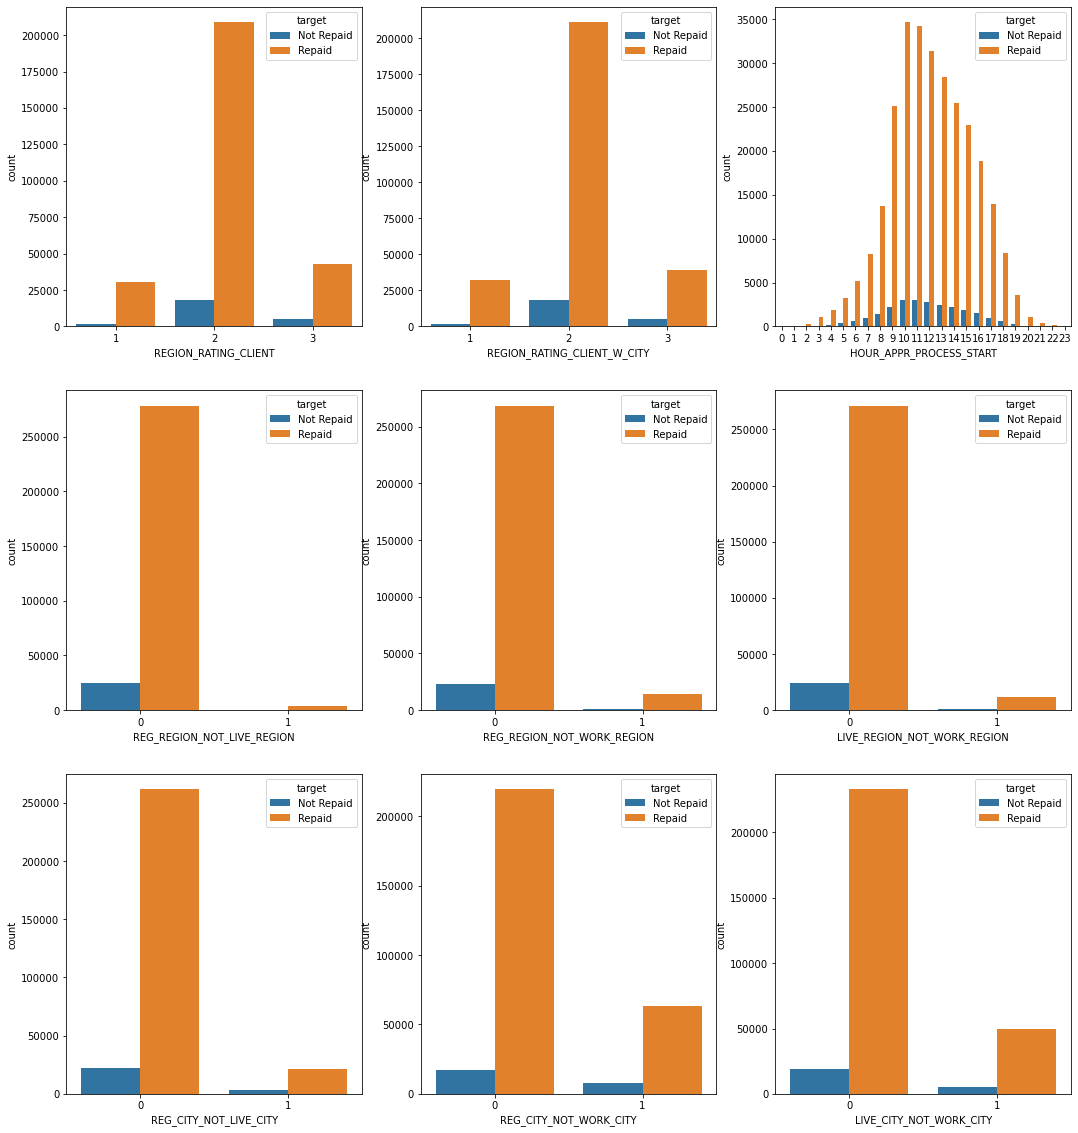

In [14]:
visual_dat= ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']


fig=plt.figure(figsize=(18,20))

a,b,c=3,3,1

for i in visual_dat:
    plt.subplot(a,b,c)
    sns.countplot(risk[i],hue=risk['target'])
    c=c+1
plt.show()

* Its clear that by looking at the above given plot  based on Region Rating and the Region customer registed with rating 2 has high count where not able to pay loan back compare to 1 and 3 ratings.

* Its clear that by looking at the above given plot  based HOUR_APPR_PROCESS_START, Applicants who applied in mid day time(11 to 12) has high count where not able to pay loan back compare to other time.

* Its clear that by looking at the above given plot  based REG Region, Applicants whos REG region is same as working and living region has high count where not able to pay loan back compare to whos not same. And those who lives in region where they working are more likely not able to repay.

* Its clear that by looking at the above given plot  based REG City, Applicants whos REG city is same as working and living city has high count where not able to pay loan back compare to whos not same. And those who lives in city where they working are more likely not able to repay.

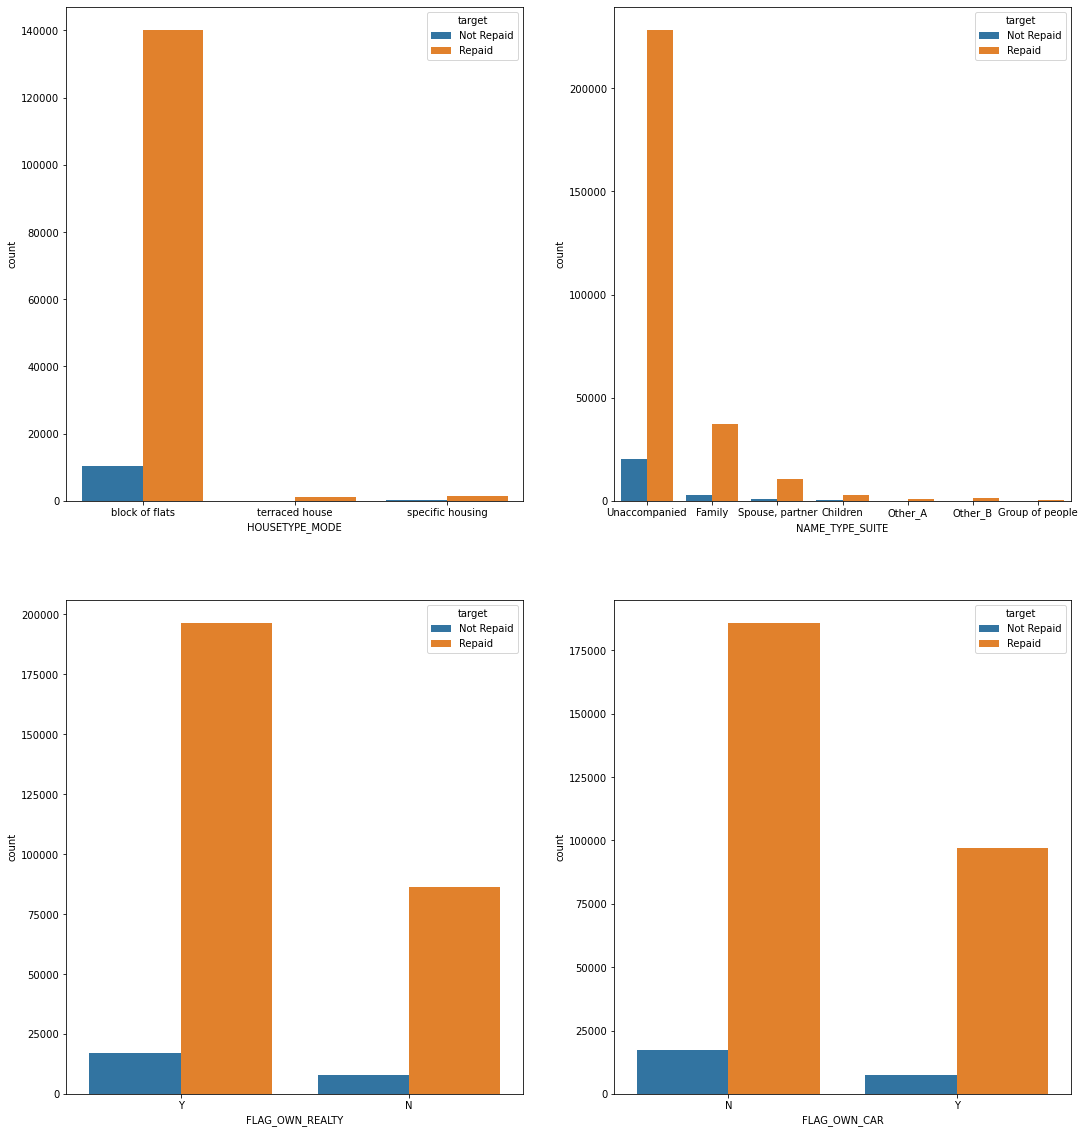

In [15]:
visual_dat= ['HOUSETYPE_MODE','NAME_TYPE_SUITE',
             'FLAG_OWN_REALTY','FLAG_OWN_CAR',]


fig=plt.figure(figsize=(18,20))

a,b,c=2,2,1

for i in visual_dat:
    plt.subplot(a,b,c)
    sns.countplot(risk[i],hue=risk['target'])
    c=c+1
plt.show()

* Its clear that by looking at the above given plot  based Housetype Mode and the customer registed on Block of flats has high count where not able to pay loan back compare to all other.

* Its clear that by looking at the above given plot based on Suite type and the unaccompanied customer has high count where not able to pay loan back compare to all other.

* Its clear that by looking at the above given plot based on owning Realty type, customer has Reality has high count where not able to pay loan back compare to all other.

* Its clear that by looking at the above given plot based on owning car type and the customer with no car has high count where not able to pay loan back compare to all other.

In [16]:
cat_col= [col for col in app.columns if app[col].dtypes=='object']
cat_col
app_cat=app[['TARGET','NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']]

app_cat

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,0,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,0,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,0,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No
307507,0,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,reg oper account,block of flats,"Stone, brick",No
307508,0,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel,No
307509,1,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,NaN,block of flats,"Stone, brick",No


In [17]:
num_feature=app.select_dtypes(exclude=['object'])
list(num_feature.columns)

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

#### Analysis of Numerical features for data visualization

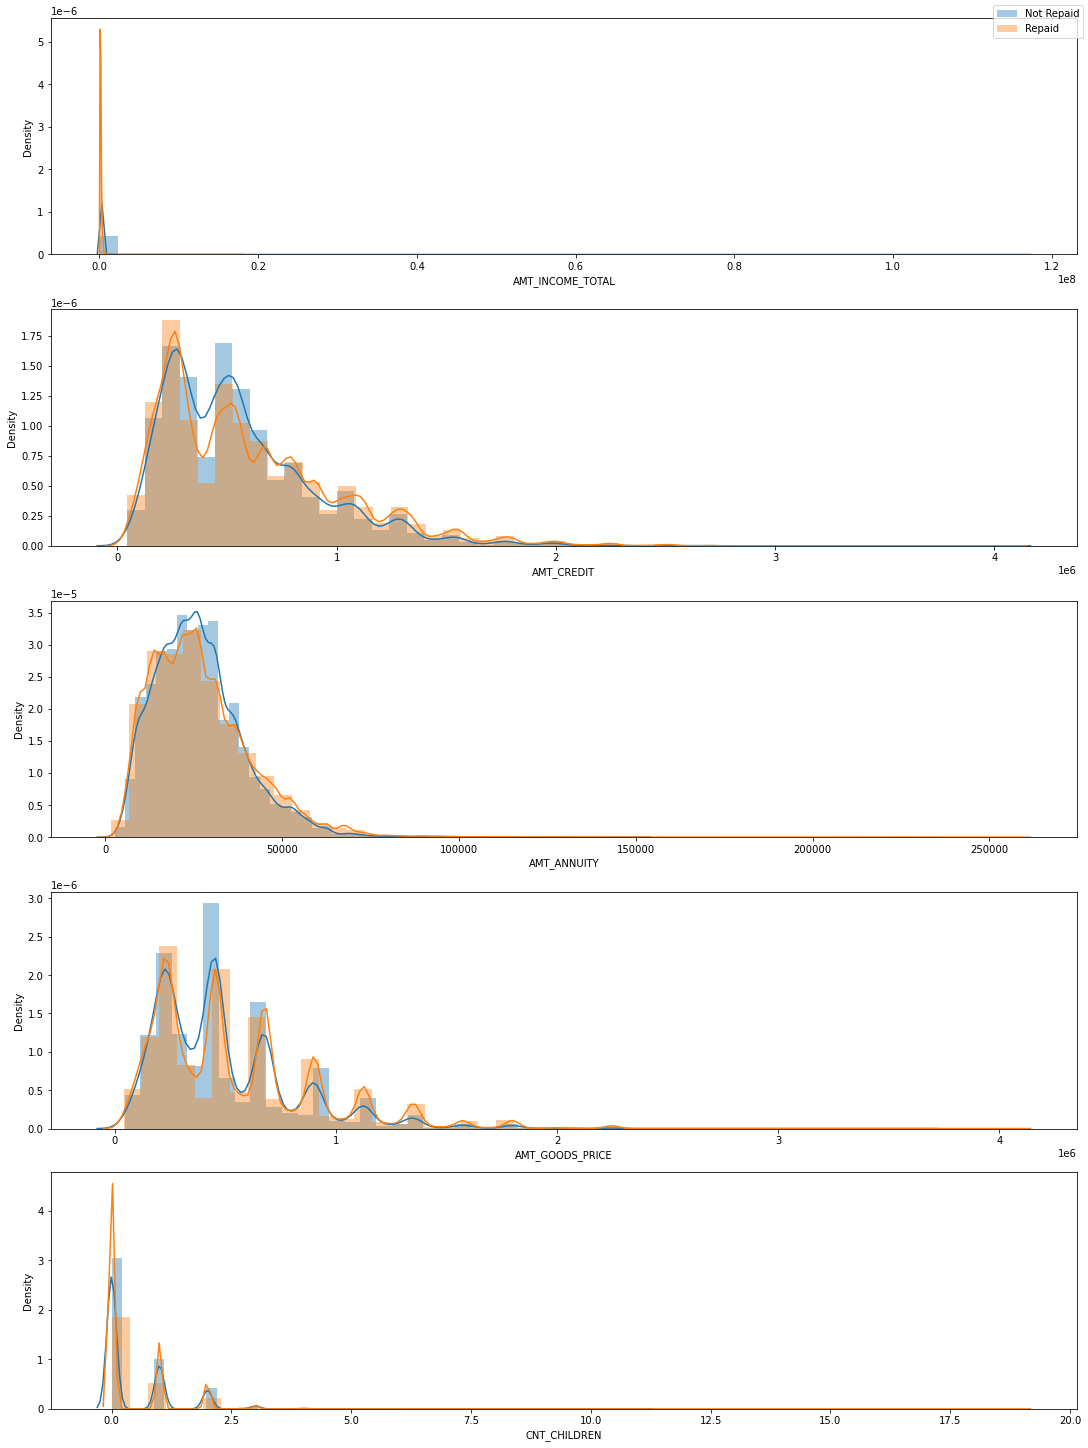

In [18]:
#Amount Distribution
fig,ax =  plt.subplots(5,1,figsize=(15,20),squeeze=True,constrained_layout=True)

sns.distplot(risk[risk['TARGET']==1]['AMT_INCOME_TOTAL'],ax=ax[0],label='Not Repaid')
sns.distplot(risk[risk['TARGET']==0]['AMT_INCOME_TOTAL'],ax=ax[0],label='Repaid')

sns.distplot(risk[risk['TARGET']==1]['AMT_CREDIT'],ax=ax[1])
sns.distplot(risk[risk['TARGET']==0]['AMT_CREDIT'],ax=ax[1])

sns.distplot(risk[risk['TARGET']==1]['AMT_ANNUITY'],ax=ax[2])
sns.distplot(risk[risk['TARGET']==0]['AMT_ANNUITY'],ax=ax[2])

sns.distplot(risk[risk['TARGET']==1]['AMT_GOODS_PRICE'],ax=ax[3])
sns.distplot(risk[risk['TARGET']==0]['AMT_GOODS_PRICE'],ax=ax[3])

sns.distplot(risk[risk['TARGET']==1]['CNT_CHILDREN'],ax=ax[4])
sns.distplot(risk[risk['TARGET']==0]['CNT_CHILDREN'],ax=ax[4])

fig.legend()
plt.show()

* If we see the above given distrbution plots its clear say major distrbuiton for amount income total, amount credit, amt goods price are from 0 to 1000000, and amount of annuity is from 0 to 75000.

* Its clear that by looking at the above given plot based count of children and the customer with has No children has high count where not able to pay loan back compare to others who has more number of children.

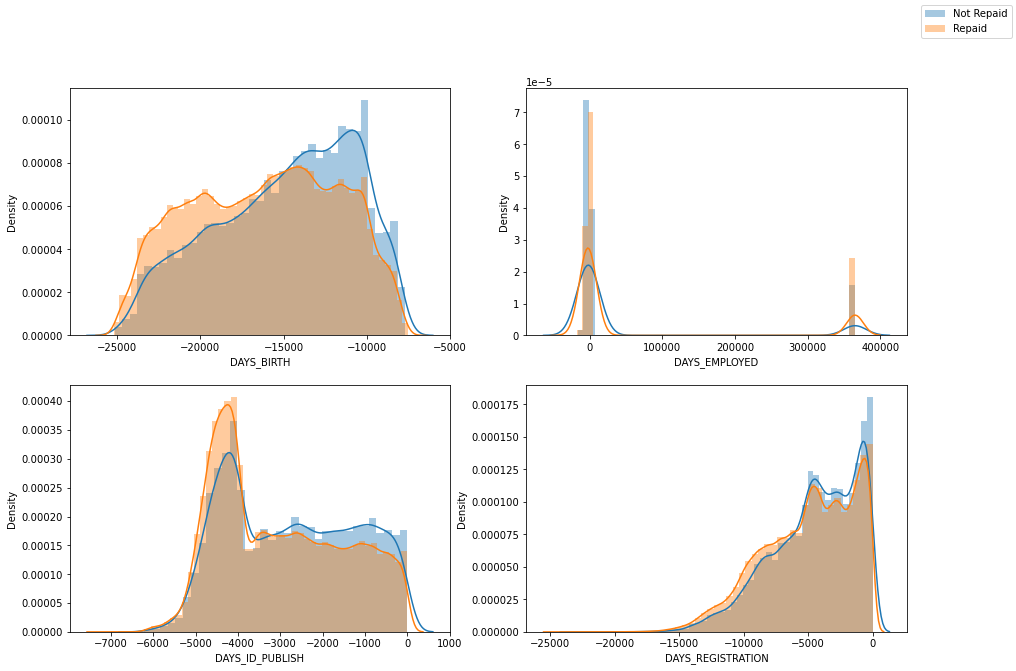

In [19]:
#Days Distribution
fig,ax =  plt.subplots(2,2,figsize=(15,10))

sns.distplot(risk[risk['TARGET']==1]['DAYS_BIRTH'],ax=ax[0,0],label='Not Repaid')
sns.distplot(risk[risk['TARGET']==0]['DAYS_BIRTH'],ax=ax[0,0],label='Repaid')

sns.distplot(risk[risk['TARGET']==1]['DAYS_EMPLOYED'],ax=ax[0,1])
sns.distplot(risk[risk['TARGET']==0]['DAYS_EMPLOYED'],ax=ax[0,1])

sns.distplot(risk[risk['TARGET']==1]['DAYS_ID_PUBLISH'],ax=ax[1,0])
sns.distplot(risk[risk['TARGET']==0]['DAYS_ID_PUBLISH'],ax=ax[1,0])

sns.distplot(risk[risk['TARGET']==1]['DAYS_REGISTRATION'],ax=ax[1,1])
sns.distplot(risk[risk['TARGET']==0]['DAYS_REGISTRATION'],ax=ax[1,1])

fig.legend()
plt.show()

Above plots shows the distribution of Days analysis with Birth date(age),current Employement, Id published(Identity Changed) and Registered day Before the application.

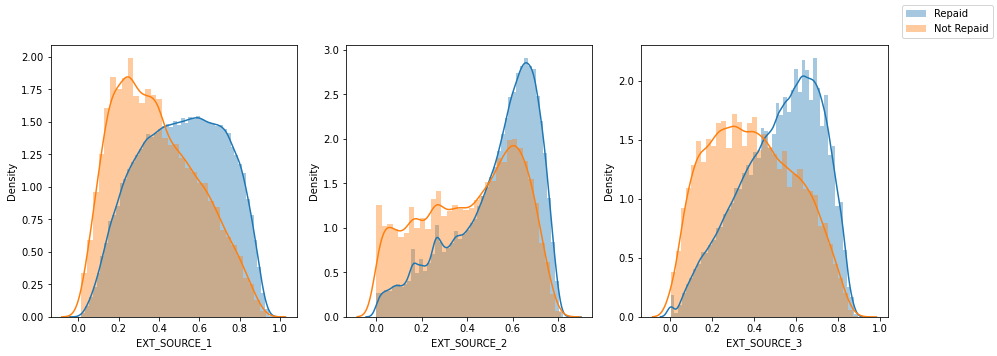

In [20]:
#Exit Sources Distribution
f,ax=plt.subplots(1,3,figsize=(15,5))

sns.distplot(risk[risk['TARGET']==0]['EXT_SOURCE_1'],ax=ax[0],label='Repaid')
sns.distplot(risk[risk['TARGET']==1]['EXT_SOURCE_1'],ax=ax[0],label='Not Repaid')

sns.distplot(risk[risk['TARGET']==0]['EXT_SOURCE_2'],ax=ax[1])
sns.distplot(risk[risk['TARGET']==1]['EXT_SOURCE_2'],ax=ax[1])

sns.distplot(risk[risk['TARGET']==0]['EXT_SOURCE_3'],ax=ax[2])
sns.distplot(risk[risk['TARGET']==1]['EXT_SOURCE_3'],ax=ax[2])


f.legend()
plt.show()

Above 3 plots of distribution shows how different EXT Sources (1,2,3) distributed.

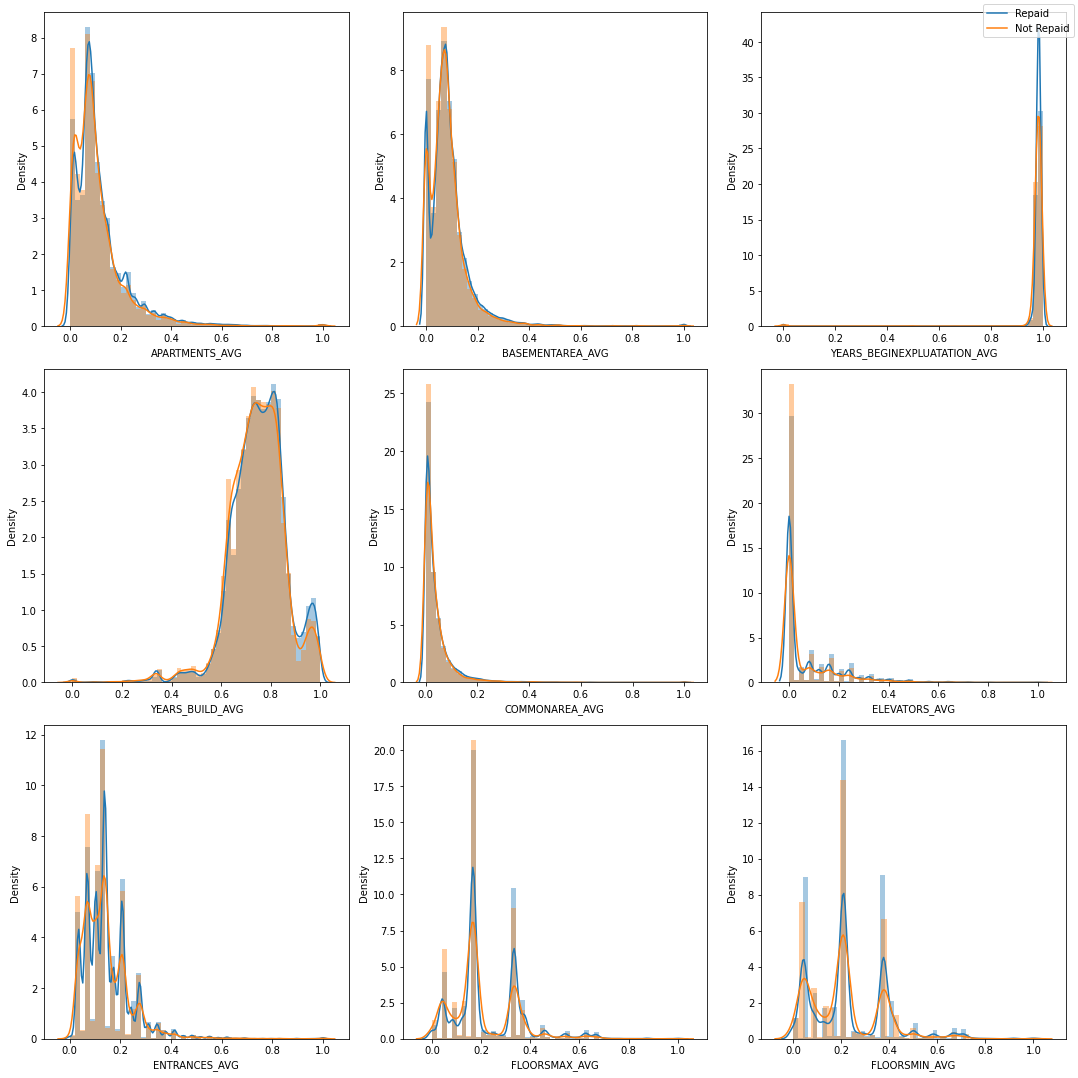

In [21]:
#average values distribution
avg_list=['APARTMENTS_AVG', 'BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG', 
          'YEARS_BUILD_AVG', 'COMMONAREA_AVG','ELEVATORS_AVG', 
          'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG']

fig=plt.figure(figsize=(15,15))
a,b,c=3,3,1
for i in avg_list:
    plt.subplot(a,b,c)
    sns.distplot(risk[risk['TARGET']==0][i])
    sns.distplot(risk[risk['TARGET']==1][i])
    c=c+1
    

fig.legend(labels=['Repaid','Not Repaid'])
fig.tight_layout()
plt.show()
    

Above plots gives distribution of average values of Apartments, Basement Area, Years Built, Common Area, Elevators, Entrances, Maximum floors, Minimum floors where client lives.

### Exploration of Bureau Data

In [22]:
#reading Bureau csv file
br_data=pd.read_csv('bureau.csv')
br_data

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [23]:
#Checking Brief information about Bureau data
br_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [24]:
#description of the application data
br_data.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


#### Identifying Missing Value Present in  Bureau Dataset

In [25]:
count=br_data.isnull().sum().sort_values(ascending=False)
percentage=((br_data.isnull().sum()/len(br_data))*100).sort_values(ascending=False)
missing_br=pd.concat([count,percentage],keys=['counts','percentage'],axis=1)
missing_br.head(10)

,counts,percentage
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000


#### Finding Numerical and categeical Variables in Bureau data

In [26]:
type_features(br_data)

categorical_features : ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']

numerical_features: ['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY']


In [27]:
br_data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

CREDIT_ACTIVE       4
CREDIT_CURRENCY     4
CREDIT_TYPE        15
dtype: int64

Since there are more than 2 categories in some features, So we have to use both Label Encoder and One hot Encoding.

In [28]:
#merging Bureau data with Risk data for data visualization
rb=risk.merge(br_data,on='SK_ID_CURR')
rb

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1038.0,NaN,0,40761.0,NaN,NaN,0.0,Credit card,-1038,0.0
1,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-48.0,NaN,0,0.0,0.00,NaN,0.0,Credit card,-47,NaN
2,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1185.0,0.000,0,135000.0,0.00,0.0,0.0,Consumer credit,-1185,0.0
3,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-911.0,3321.000,0,19071.0,NaN,NaN,0.0,Consumer credit,-906,0.0
4,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-36.0,5043.645,0,120735.0,0.00,0.0,0.0,Consumer credit,-34,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465320,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,NaN,0.000,0,436032.0,363573.54,0.0,0.0,Consumer credit,-25,0.0
1465321,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,NaN,15439.905,0,450000.0,191005.47,0.0,0.0,Consumer credit,-55,3244.5
1465322,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,-781.0,25578.000,0,900000.0,NaN,NaN,0.0,Consumer credit,-781,0.0
1465323,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,-779.0,2646.000,1,38925.0,NaN,NaN,0.0,Credit card,-779,3244.5


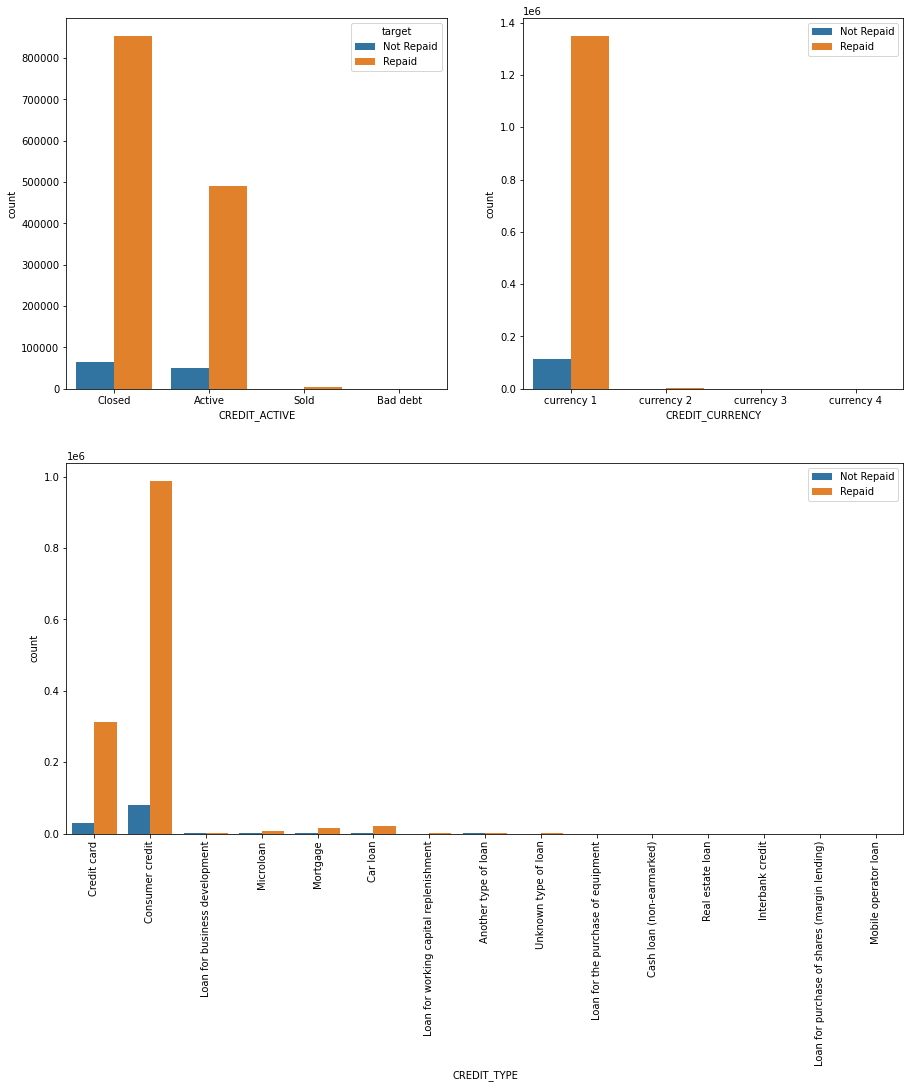

In [29]:
#plotting some categorical features

fi=plt.figure(figsize=(15, 15))

ax1 = plt.subplot(2,2,1)
sns.countplot(rb.CREDIT_ACTIVE,hue=rb.target)

ax2 = plt.subplot(2,2,2)
sns.countplot(rb.CREDIT_CURRENCY,hue=rb.target)
ax2.legend(loc=1)

ax3 = plt.subplot(2,1,2)
g=sns.countplot(rb.CREDIT_TYPE,hue=rb.target)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
ax3.legend(loc=1)

axes = [ax1, ax2, ax3]
plt.show()

Based on above given plost, its clear that the Credit active customer with in group of closed customer has high count of non payer and credit currency customer with currency 1 has high count of non payer and based on Credit type consumer credit has high count of non payer of loan.

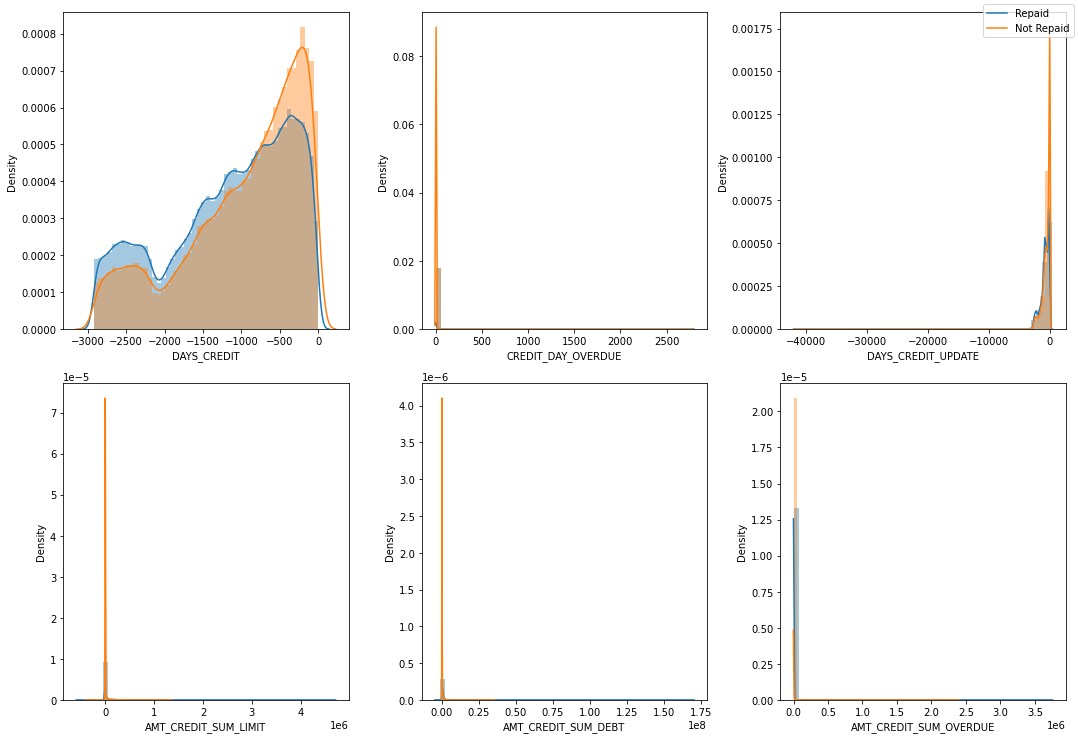

In [30]:
#plotting of numerical features
lst=['DAYS_CREDIT','CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_UPDATE','AMT_CREDIT_SUM_LIMIT', 
          'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_OVERDUE']

fig=plt.figure(figsize=(15,15))
a,b,c=3,3,1
for i in lst:
    plt.subplot(a,b,c)
    sns.distplot(rb[rb['TARGET']==0][i])
    sns.distplot(rb[rb['TARGET']==1][i])
    c=c+1
    

fig.legend(labels=['Repaid','Not Repaid'])
fig.tight_layout()
plt.show()
    

Above plots gives distribution of Credits of Days, days Overdue, Days update,  Sum limit, Sum Debt and Sum Overdue of Bureau application. 

### Exploration of Bureau Balance Data

In [31]:
#reading of Bureau balance data
bb=pd.read_csv('bureau_balance.csv')
bb

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [32]:
#Brief inormation about bureau data 
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [33]:
#checking misiing values present in the bureau balance data
bb.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

There are no missing values present in this data

<AxesSubplot:xlabel='STATUS', ylabel='count'>

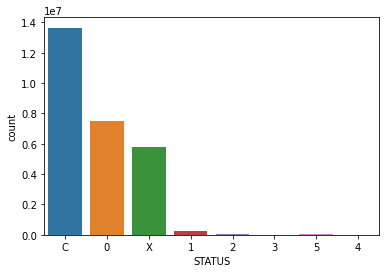

In [34]:
sns.countplot(bb.STATUS)

From the above countplot it is clear that Closed Credit Bureau loan balance has Majority.. 

###  Exploration of Previous Application Data

In [35]:
#Reading Previous application csv file
prv_app=pd.read_csv('previous_application.csv')
prv_app

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [36]:
#Brief information of previous application data
prv_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [37]:
#description of the application data
prv_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [38]:
#Checking out missing values of Previous application data
count=prv_app.isnull().sum().sort_values(ascending=False)
percentage=((prv_app.isnull().sum()/len(prv_app))*100).sort_values(ascending=False)

missing_prv_app=pd.concat([count,percentage],keys=['counts','percentage'],axis=1)
missing_prv_app.head(20)

,counts,percentage
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
AMT_DOWN_PAYMENT,895844,53.636480
RATE_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_TERMINATION,673065,40.298129
DAYS_LAST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129


In [39]:
#Checking out how many categories present in each categorical feature
prv_app.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE              4
WEEKDAY_APPR_PROCESS_START      7
FLAG_LAST_APPL_PER_CONTRACT     2
NAME_CASH_LOAN_PURPOSE         25
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_TYPE_SUITE                 7
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            28
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
NAME_SELLER_INDUSTRY           11
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64

Since there are more than 2 categories in some features, So we have to use both Label Encoder and One hot Encoding.

#### Finding Numerical and categeical Variables in Bureau data

In [40]:
type_features(prv_app)

categorical_features : ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']

numerical_features: ['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


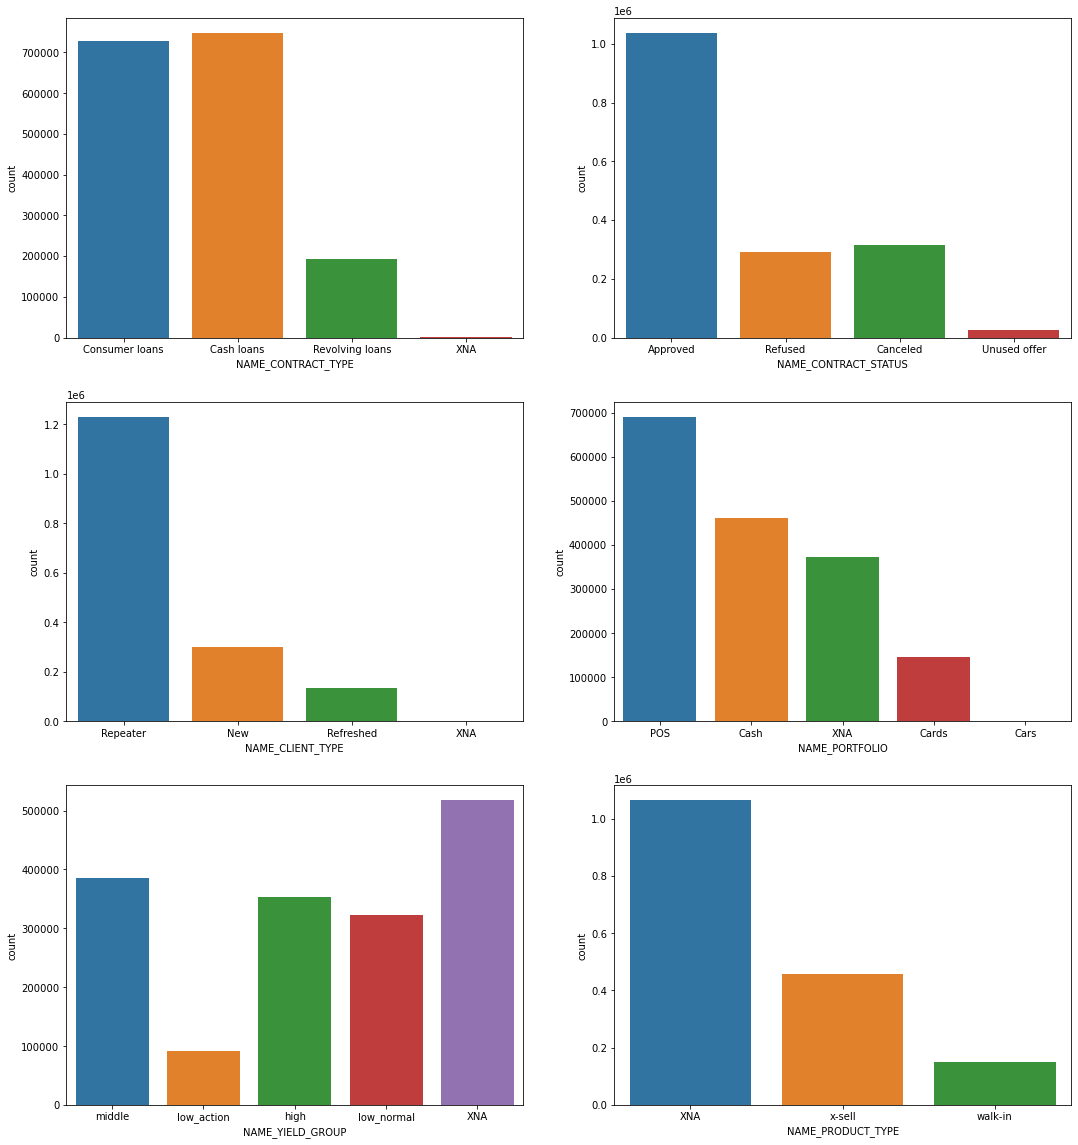

In [41]:
#plotting of some categorical features
dat= ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS',
     'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO',
       'NAME_YIELD_GROUP', 'NAME_PRODUCT_TYPE']


fig=plt.figure(figsize=(18,20))

a,b,c=3,2,1

for i in dat:
    plt.subplot(a,b,c)
    sns.countplot(prv_app[i])
    c=c+1
plt.show()

* Above plots describes that, Cash loans and Consumer loans has high count in previous application.

* Most of the previous applications are Aprroved and Repeaters application and more of POS type.


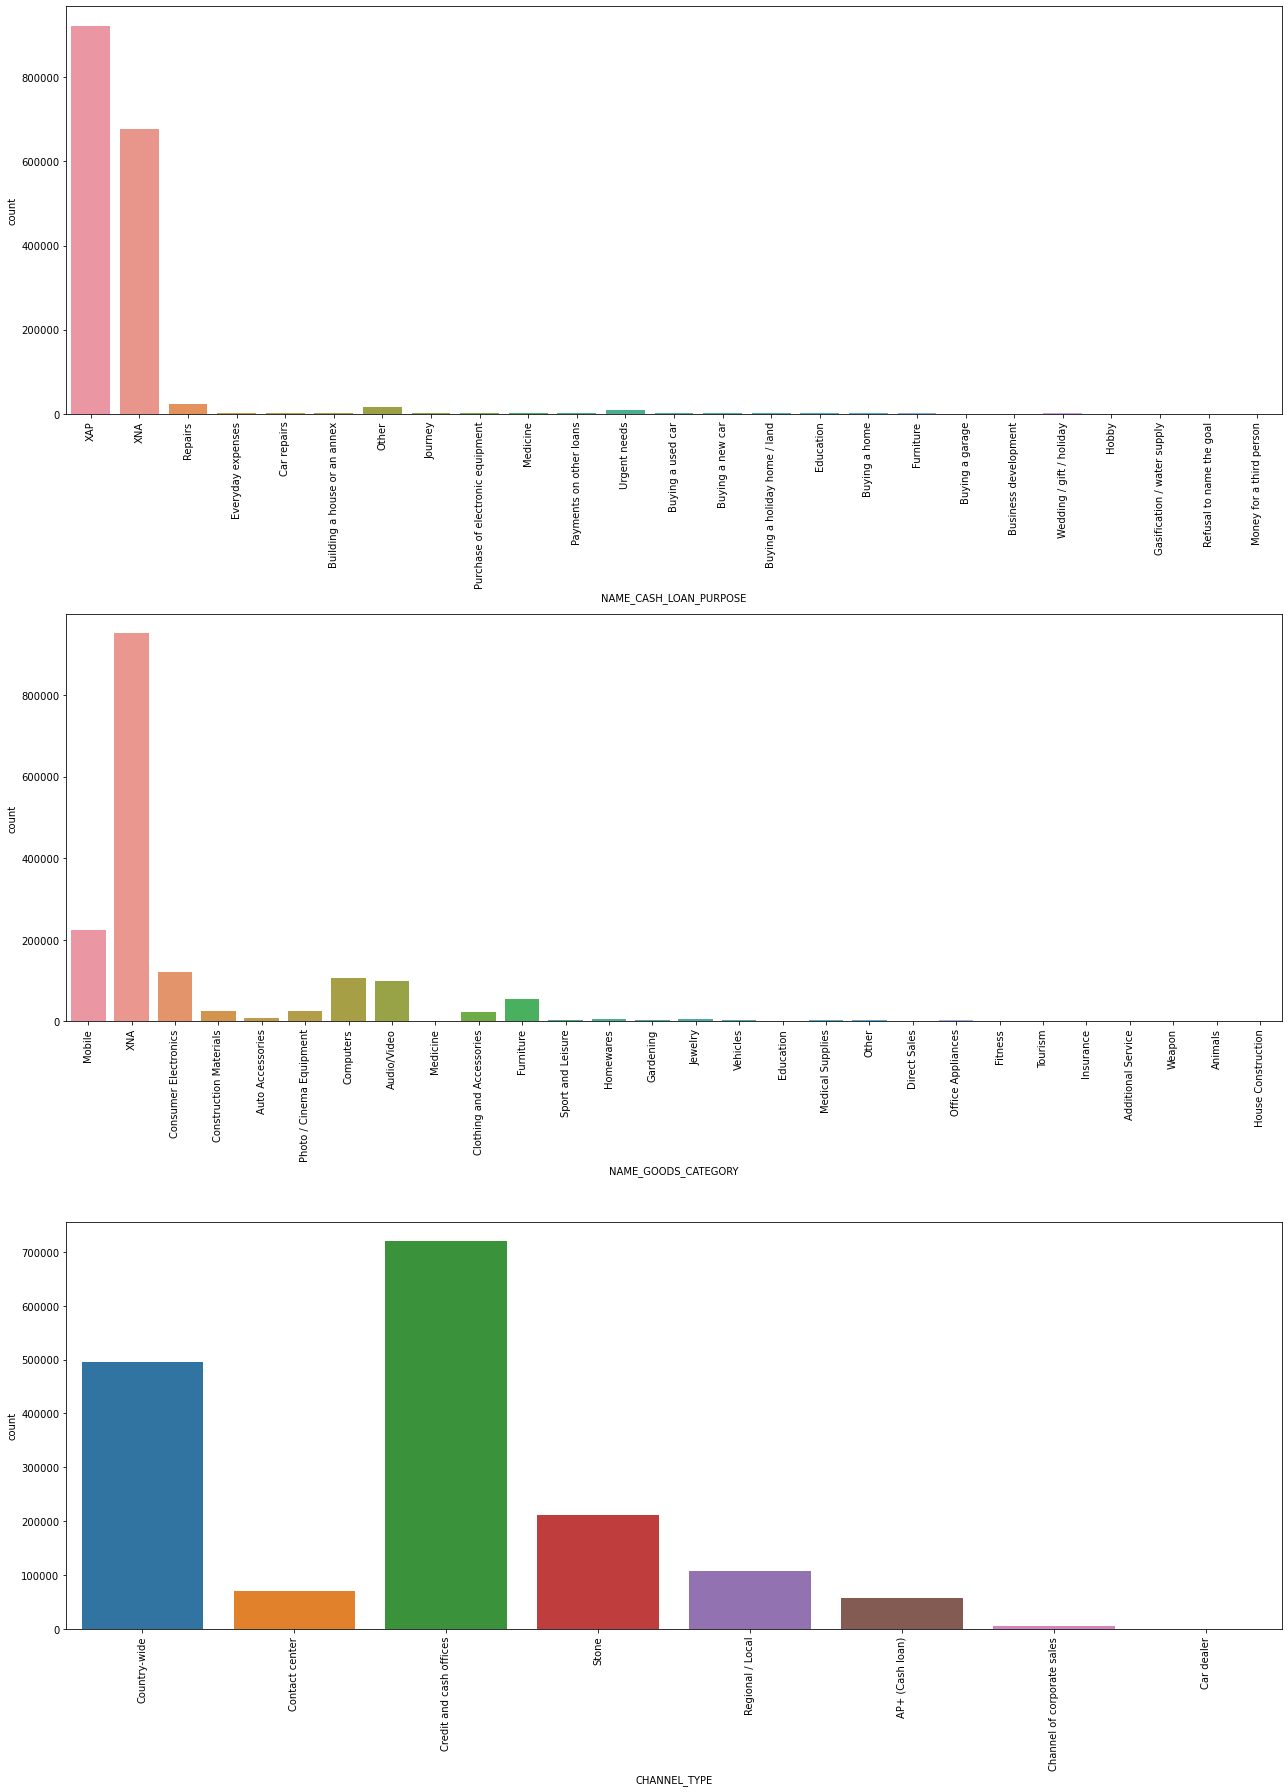

In [42]:

dat= ['NAME_CASH_LOAN_PURPOSE','NAME_GOODS_CATEGORY',
     'CHANNEL_TYPE']


fig=plt.figure(figsize=(18,25))

a,b,c=3,1,1

for i in dat:
    plt.subplot(a,b,c)
    g=sns.countplot(prv_app[i])
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    c=c+1

fig.tight_layout()    
plt.show()

As per above plots we can see that, most of all previous application are for XAP purpose through Credit card cash officers.

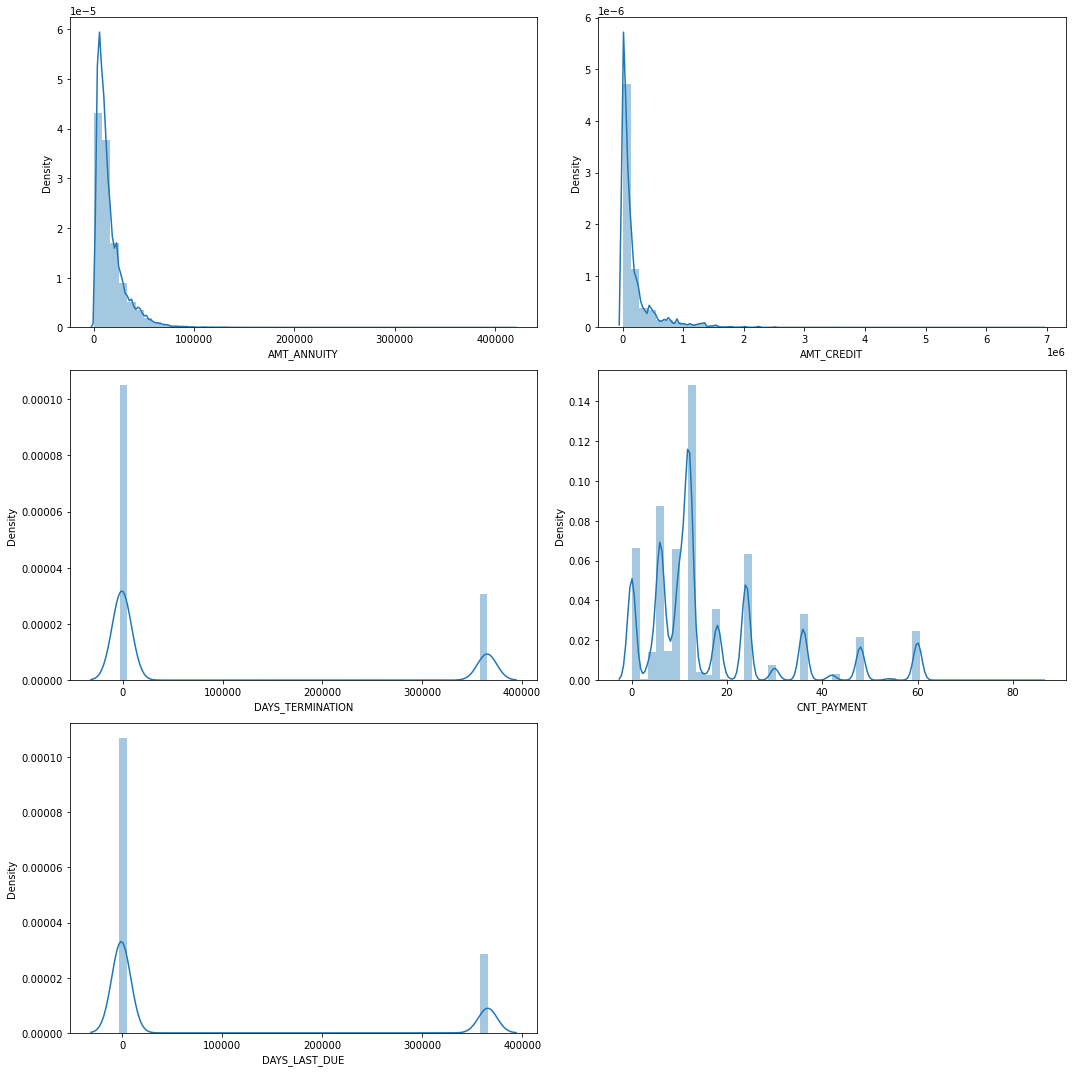

In [43]:
#plotting of numerical features
lst=['AMT_ANNUITY','AMT_CREDIT','DAYS_TERMINATION', 
          'CNT_PAYMENT', 'DAYS_LAST_DUE']

fig=plt.figure(figsize=(15,15))
a,b,c=3,2,1
for i in lst:
    plt.subplot(a,b,c)
    sns.distplot(prv_app[i])
    c=c+1
    


fig.tight_layout()
plt.show()

Above plots gives distribution of Amount annuity and Credit, Days termination,Count Payment,and Days last due of Previous  application. 

## Feature Engineering

### Feature Engineering of Bureau Data

In [44]:
#Bureau balance data
bb

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [45]:
#one hot encoding for categorical features of Bureau balance data
bb=pd.get_dummies(bb)
bb

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,5715448,0,0,0,0,0,0,0,1,0
1,5715448,-1,0,0,0,0,0,0,1,0
2,5715448,-2,0,0,0,0,0,0,1,0
3,5715448,-3,0,0,0,0,0,0,1,0
4,5715448,-4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
27299920,5041336,-47,0,0,0,0,0,0,0,1
27299921,5041336,-48,0,0,0,0,0,0,0,1
27299922,5041336,-49,0,0,0,0,0,0,0,1
27299923,5041336,-50,0,0,0,0,0,0,0,1


In [46]:
#counting and taking of average of bureau balance for given bureau id
bb_count=bb[['SK_ID_BUREAU','MONTHS_BALANCE']].groupby('SK_ID_BUREAU').count()
bb_avg = bb.groupby('SK_ID_BUREAU').mean()
bb_avg['bb_count'] = bb['SK_ID_BUREAU'].map(bb_count['MONTHS_BALANCE'])
bb_avg.columns = ['avg_bb _' + f_ for f_ in bb_avg.columns]
bb_avg

,avg_bb _MONTHS_BALANCE,avg_bb _STATUS_0,avg_bb _STATUS_1,avg_bb _STATUS_2,avg_bb _STATUS_3,avg_bb _STATUS_4,avg_bb _STATUS_5,avg_bb _STATUS_C,avg_bb _STATUS_X,avg_bb _bb_count
SK_ID_BUREAU,,,,,,,,,,
5001709,-48.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.886598,0.113402,10
5001710,-41.0,0.060241,0.000000,0.0,0.0,0.0,0.0,0.578313,0.361446,10
5001711,-1.5,0.750000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.250000,10
5001712,-9.0,0.526316,0.000000,0.0,0.0,0.0,0.0,0.473684,0.000000,10
5001713,-10.5,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,10
...,...,...,...,...,...,...,...,...,...,...
6842884,-23.5,0.187500,0.000000,0.0,0.0,0.0,0.0,0.416667,0.395833,52
6842885,-11.5,0.500000,0.000000,0.0,0.0,0.0,0.5,0.000000,0.000000,52
6842886,-16.0,0.242424,0.000000,0.0,0.0,0.0,0.0,0.757576,0.000000,52


In [47]:
#one hot encodinng for categorical features bureau data
br_data=pd.get_dummies(br_data)
br_data


,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,215354,5714462,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,...,0,0,0,0,0,0,0,0,0,0
1,215354,5714463,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,...,0,0,0,0,0,0,0,0,0,0
2,215354,5714464,-203,0,528.0,NaN,NaN,0,464323.50,NaN,...,0,0,0,0,0,0,0,0,0,0
3,215354,5714465,-203,0,NaN,NaN,NaN,0,90000.00,NaN,...,0,0,0,0,0,0,0,0,0,0
4,215354,5714466,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,...,0,0,0,0,0,1,0,0,0,0
1716424,100044,5057754,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,...,0,0,0,0,0,0,0,0,0,0
1716425,100044,5057762,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,...,0,0,0,0,0,0,0,0,0,0
1716426,246829,5057770,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#Merging bureau balance data with bureau data
br_full= br_data.merge(right=bb_avg.reset_index(), how='left', on='SK_ID_BUREAU')
br_full

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,avg_bb _MONTHS_BALANCE,avg_bb _STATUS_0,avg_bb _STATUS_1,avg_bb _STATUS_2,avg_bb _STATUS_3,avg_bb _STATUS_4,avg_bb _STATUS_5,avg_bb _STATUS_C,avg_bb _STATUS_X,avg_bb _bb_count
0,215354,5714462,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,-203,0,528.0,NaN,NaN,0,464323.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,-203,0,NaN,NaN,NaN,0,90000.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1716424,100044,5057754,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1716425,100044,5057762,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1716426,246829,5057770,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
#counting and taking of average of bureau id for given application id
bureau_avg = br_full.groupby('SK_ID_CURR').mean()
bureau_avg['br_full_count'] = br_data[['SK_ID_BUREAU','SK_ID_CURR']].groupby('SK_ID_CURR').count()['SK_ID_BUREAU']
bureau_avg.columns = ['b_' + f_ for f_ in bureau_avg.columns]
bureau_avg.drop('b_SK_ID_BUREAU',axis=1,inplace=True)
bureau_avg

,b_DAYS_CREDIT,b_CREDIT_DAY_OVERDUE,b_DAYS_CREDIT_ENDDATE,b_DAYS_ENDDATE_FACT,b_AMT_CREDIT_MAX_OVERDUE,b_CNT_CREDIT_PROLONG,b_AMT_CREDIT_SUM,b_AMT_CREDIT_SUM_DEBT,b_AMT_CREDIT_SUM_LIMIT,b_AMT_CREDIT_SUM_OVERDUE,...,b_avg_bb _STATUS_0,b_avg_bb _STATUS_1,b_avg_bb _STATUS_2,b_avg_bb _STATUS_3,b_avg_bb _STATUS_4,b_avg_bb _STATUS_5,b_avg_bb _STATUS_C,b_avg_bb _STATUS_X,b_avg_bb _bb_count,b_br_full_count
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,-735.000000,0.0,82.428571,-825.500000,NaN,0.000000,2.076236e+05,85240.928571,0.00000,0.0,...,0.336651,0.007519,0.0,0.0,0.0,0.0,0.441240,0.214590,31.000000,7
100002,-874.000000,0.0,-349.000000,-697.500000,1681.029,0.000000,1.081319e+05,49156.200000,7997.14125,0.0,...,0.406960,0.255682,0.0,0.0,0.0,0.0,0.175426,0.161932,21.625000,8
100003,-1400.750000,0.0,-544.500000,-1097.333333,0.000,0.000000,2.543501e+05,0.000000,202500.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
100004,-867.000000,0.0,-488.500000,-532.500000,0.000,0.000000,9.451890e+04,0.000000,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
100005,-190.666667,0.0,439.333333,-123.000000,0.000,0.000000,2.190420e+05,189469.500000,0.00000,0.0,...,0.735043,0.000000,0.0,0.0,0.0,0.0,0.128205,0.136752,52.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456249,-1667.076923,0.0,-1232.333333,-1364.750000,6147.000,0.000000,2.841430e+05,16307.100000,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
456250,-862.000000,0.0,1288.333333,-760.000000,0.000,0.000000,1.028820e+06,744013.365000,19422.79500,0.0,...,0.130259,0.000000,0.0,0.0,0.0,0.0,0.252525,0.617216,41.333333,3
456253,-867.500000,0.0,280.500000,-794.000000,NaN,0.000000,9.900000e+05,448958.250000,0.00000,0.0,...,0.404906,0.000000,0.0,0.0,0.0,0.0,0.459677,0.135417,65.500000,4


### Feature Engineering of Previous Application Data

In [50]:
#previous application data
prv_app

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [51]:
#importing label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [52]:
#checking out missing values present in the previous application data
count=prv_app.isnull().sum().sort_values(ascending=False)
percentage=((prv_app.isnull().sum()/len(prv_app))*100).sort_values(ascending=False)

missing_prv_app=pd.concat([count,percentage],keys=['counts','percentage'],axis=1)
missing_prv_app.head(20)

,counts,percentage
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
AMT_DOWN_PAYMENT,895844,53.636480
RATE_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_TERMINATION,673065,40.298129
DAYS_LAST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129


In [53]:
#since in some feature 99% data missing imuting them is of no use, so droping them.
prv_app.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'],inplace=True,axis=1)

#filling outliers with nan values for some features
prv_app['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
prv_app['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
prv_app['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
prv_app['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
prv_app['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)

In [54]:
#label encoding for  categorical features of previous application data
le_count=0
for col in prv_app.columns:
    if prv_app[col].dtypes =='object':
        if len(prv_app[col].value_counts()) <=2:
            prv_app[col]=le.fit_transform(prv_app[col])
            le_count +=1
           
               
print('{} Features are label encoded'.format(le_count))


1 Features are label encoded


In [55]:
#one hot encoding fpr categorical features with more than 2 categories
cat_col= [col for col in prv_app.columns if prv_app[col].dtypes=='object']
prv_app=pd.get_dummies(prv_app,columns=cat_col)
prv_app.head(10)

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
0,2030495,271877,1730.430,17145.0,17145.0,0.0,17145.0,15,1,1,...,0,0,0,0,0,0,1,0,0,0
1,2802425,108129,25188.615,607500.0,679671.0,NaN,607500.0,11,1,1,...,1,0,0,0,0,0,0,0,0,0
2,2523466,122040,15060.735,112500.0,136444.5,NaN,112500.0,11,1,1,...,0,0,0,0,0,0,0,0,0,0
3,2819243,176158,47041.335,450000.0,470790.0,NaN,450000.0,7,1,1,...,0,1,0,0,0,0,0,0,0,0
4,1784265,202054,31924.395,337500.0,404055.0,NaN,337500.0,9,1,1,...,0,0,0,0,0,0,0,0,0,0
5,1383531,199383,23703.930,315000.0,340573.5,NaN,315000.0,8,1,1,...,1,0,0,0,0,0,0,0,0,0
6,2315218,175704,NaN,0.0,0.0,NaN,NaN,11,1,1,...,0,0,0,0,0,0,0,0,0,0
7,1656711,296299,NaN,0.0,0.0,NaN,NaN,7,1,1,...,0,0,0,0,0,0,0,0,0,0
8,2367563,342292,NaN,0.0,0.0,NaN,NaN,15,1,1,...,0,0,0,0,0,0,0,0,0,0
9,2579447,334349,NaN,0.0,0.0,NaN,NaN,15,1,1,...,0,0,0,0,0,0,0,0,0,0


In [56]:
## count the number of previous applications for a given ID
prv_app_count = prv_app[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
prv_app['SK_ID_PREV'] = prv_app['SK_ID_CURR'].map(prv_app_count['SK_ID_PREV'])

## mean values for all other features in previous applications
prv_app_avg = prv_app.groupby('SK_ID_CURR').mean()
prv_app_avg.columns = ['p_' + col for col in prv_app_avg.columns]
prv_app_avg

,p_SK_ID_PREV,p_AMT_ANNUITY,p_AMT_APPLICATION,p_AMT_CREDIT,p_AMT_DOWN_PAYMENT,p_AMT_GOODS_PRICE,p_HOUR_APPR_PROCESS_START,p_FLAG_LAST_APPL_PER_CONTRACT,p_NFLAG_LAST_APPL_IN_DAY,p_RATE_DOWN_PAYMENT,...,p_PRODUCT_COMBINATION_Cash X-Sell: low,p_PRODUCT_COMBINATION_Cash X-Sell: middle,p_PRODUCT_COMBINATION_POS household with interest,p_PRODUCT_COMBINATION_POS household without interest,p_PRODUCT_COMBINATION_POS industry with interest,p_PRODUCT_COMBINATION_POS industry without interest,p_PRODUCT_COMBINATION_POS mobile with interest,p_PRODUCT_COMBINATION_POS mobile without interest,p_PRODUCT_COMBINATION_POS other with interest,p_PRODUCT_COMBINATION_POS others without interest
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,1.0,3951.000000,24835.500,23787.00,2520.00,24835.500,13.000000,1.0,1.0,0.104326,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,1.00,0.0,0.0,0.0
100002,1.0,9251.775000,179055.000,179055.00,0.00,179055.000,9.000000,1.0,1.0,0.000000,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.00,0.0,1.0,0.0
100003,3.0,56553.990000,435436.500,484191.00,3442.50,435436.500,14.666667,1.0,1.0,0.050030,...,0.333333,0.00,0.333333,0.0,0.333333,0.0,0.00,0.0,0.0,0.0
100004,1.0,5357.250000,24282.000,20106.00,4860.00,24282.000,5.000000,1.0,1.0,0.212008,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.00,1.0,0.0,0.0
100005,2.0,4813.200000,22308.750,20076.75,4464.00,44617.500,10.500000,1.0,1.0,0.108964,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.50,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,1.0,6605.910000,40455.000,40455.00,0.00,40455.000,17.000000,1.0,1.0,0.000000,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,1.00,0.0,0.0,0.0
456252,1.0,10074.465000,57595.500,56821.50,3456.00,57595.500,10.000000,1.0,1.0,0.062443,...,0.000000,0.00,0.000000,1.0,0.000000,0.0,0.00,0.0,0.0,0.0
456253,2.0,4770.405000,24162.750,20625.75,4403.25,24162.750,11.500000,1.0,1.0,0.214316,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,1.00,0.0,0.0,0.0


### Feature Engineering of POS Cash Balance Data

In [57]:
#Reading of POS cash balance file
pcb=pd.read_csv('POS_CASH_balance.csv')
pcb

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
1048570,2674109,363927,-2,48.0,39.0,Active,0,0
1048571,1359930,438122,-4,20.0,0.0,Completed,0,0
1048572,2820160,147643,-9,24.0,15.0,Active,0,0
1048573,1945170,307924,-11,12.0,7.0,Active,0,0


In [58]:
#brief information of POS cash balance data
pcb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   SK_ID_PREV             1048575 non-null  int64  
 1   SK_ID_CURR             1048575 non-null  int64  
 2   MONTHS_BALANCE         1048575 non-null  int64  
 3   CNT_INSTALMENT         1046677 non-null  float64
 4   CNT_INSTALMENT_FUTURE  1046677 non-null  float64
 5   NAME_CONTRACT_STATUS   1048575 non-null  object 
 6   SK_DPD                 1048575 non-null  int64  
 7   SK_DPD_DEF             1048575 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 64.0+ MB


In [59]:
#detail description of POS cash balance data
pcb.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.048575e+06,1.048575e+06,1.048575e+06,1.046677e+06,1.046677e+06,1.048575e+06,1.048575e+06
mean,1.904528e+06,2.784515e+05,-2.798998e+01,2.040626e+01,1.325046e+01,3.983959e-01,6.725508e-02
std,5.357570e+05,1.027679e+05,2.358757e+01,1.404666e+01,1.296211e+01,1.779276e+01,1.454376e+00
min,1.000001e+06,1.000020e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434365e+06,1.895490e+05,-4.100000e+01,1.000000e+01,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.898977e+06,2.787290e+05,-1.900000e+01,1.400000e+01,9.000000e+00,0.000000e+00,0.000000e+00
75%,2.369718e+06,3.675910e+05,-1.100000e+01,2.400000e+01,1.900000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,2.914000e+03,2.690000e+02


In [60]:
#checking out missing values present in the POS cash balance data
count=pcb.isnull().sum().sort_values(ascending=False)
percentage=((pcb.isnull().sum()/len(pcb))*100).sort_values(ascending=False)

missing_pcb_app=pd.concat([count,percentage],keys=['counts','percentage'],axis=1)
missing_pcb_app.head(20)

,counts,percentage
CNT_INSTALMENT,1898,0.181008
CNT_INSTALMENT_FUTURE,1898,0.181008
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
MONTHS_BALANCE,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
SK_DPD,0,0.000000
SK_DPD_DEF,0,0.000000


In [61]:
#checking out number of categories present in each categorical data
pcb.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_STATUS    7
dtype: int64

In [62]:
#one hot encoding for POS cash balance data
pcb=pd.get_dummies(pcb)
pcb

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed
0,1803195,182943,-31,48.0,45.0,0,0,1,0,0,0,0,0,0
1,1715348,367990,-33,36.0,35.0,0,0,1,0,0,0,0,0,0
2,1784872,397406,-32,12.0,9.0,0,0,1,0,0,0,0,0,0
3,1903291,269225,-35,48.0,42.0,0,0,1,0,0,0,0,0,0
4,2341044,334279,-35,36.0,35.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2674109,363927,-2,48.0,39.0,0,0,1,0,0,0,0,0,0
1048571,1359930,438122,-4,20.0,0.0,0,0,0,0,0,1,0,0,0
1048572,2820160,147643,-9,24.0,15.0,0,0,1,0,0,0,0,0,0
1048573,1945170,307924,-11,12.0,7.0,0,0,1,0,0,0,0,0,0


In [63]:
# count the number of pos cash for a given ID
pcb_count = pcb[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
pcb['SK_ID_PREV'] = pcb['SK_ID_CURR'].map(pcb_count['SK_ID_PREV'])

# mean Values for all other variables in pos cash
pcb_avg = pcb.groupby('SK_ID_CURR').mean()
pcb_avg

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed
SK_ID_CURR,,,,,,,,,,,,,
100002,1.0,-13.000000,24.000000,18.000000,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0
100003,2.0,-44.500000,9.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0
100005,1.0,-21.000000,12.000000,9.000000,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0
100007,6.0,-31.166667,17.666667,14.333333,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0
100008,3.0,-16.333333,22.666667,18.000000,0.0,0.0,0.666667,0.0,0.0,0.333333,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456248,8.0,-16.125000,22.500000,12.500000,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0
456249,2.0,-40.500000,12.000000,1.500000,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0
456250,5.0,-13.800000,12.000000,4.600000,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0


### Feature Engineering of Previous Installments Data

In [64]:
#Reading Previous installments file
inst=pd.read_csv('installments_payments.csv')
inst

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [65]:
#checking brief information about previous innstallments data
inst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [66]:
#detail description of previous innstallments data
inst.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [67]:
#checking out missing values present in the previous innstallments data
count=inst.isnull().sum().sort_values(ascending=False)
percentage=((inst.isnull().sum()/len(inst))*100).sort_values(ascending=False)

missing_inst_app=pd.concat([count,percentage],keys=['counts','percentage'],axis=1)
missing_inst_app.head(20)

,counts,percentage
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_PAYMENT,2905,0.021352
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
NUM_INSTALMENT_VERSION,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000
DAYS_INSTALMENT,0,0.000000
AMT_INSTALMENT,0,0.000000


In [68]:
# count the number of previous installments
cnt_inst = inst[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
inst['SK_ID_PREV'] = inst['SK_ID_CURR'].map(cnt_inst['SK_ID_PREV'])

# mean values for all other variables in installments payments
avg_inst = inst.groupby('SK_ID_CURR').mean()
avg_inst.columns = ['i_' + f_ for f_ in avg_inst.columns]
avg_inst


,i_SK_ID_PREV,i_NUM_INSTALMENT_VERSION,i_NUM_INSTALMENT_NUMBER,i_DAYS_INSTALMENT,i_DAYS_ENTRY_PAYMENT,i_AMT_INSTALMENT,i_AMT_PAYMENT
SK_ID_CURR,,,,,,,
100001,7.0,1.142857,2.714286,-2187.714286,-2195.000000,5885.132143,5885.132143
100002,19.0,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
100003,25.0,1.040000,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000
100004,3.0,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000
100005,9.0,1.111111,5.000000,-586.000000,-609.555556,6240.205000,6240.205000
...,...,...,...,...,...,...,...
456251,7.0,1.142857,4.000000,-120.000000,-156.285714,7492.924286,7492.924286
456252,6.0,1.000000,3.500000,-2391.000000,-2393.833333,10069.867500,10069.867500
456253,14.0,1.000000,4.785714,-2372.928571,-2387.428571,4399.707857,4115.915357


### Feature Engineering of Credit Card Balance Data

In [69]:
#reading Credit card balance file
ccb=pd.read_csv('credit_card_balance.csv')
ccb

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [70]:
#brief inofiormation of Credit card balance data
ccb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [71]:
#detail description of Credit card balance data
ccb.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


In [72]:
#checking out missing values present in the Credit card balance data
count=ccb.isnull().sum().sort_values(ascending=False)
percentage=((ccb.isnull().sum()/len(ccb))*100).sort_values(ascending=False)

missing_ccb_app=pd.concat([count,percentage],keys=['counts','percentage'],axis=1)
missing_ccb_app.head(20)

,counts,percentage
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208
AMT_INST_MIN_REGULARITY,305236,7.948208
SK_ID_PREV,0,0.000000


In [73]:
#counting the nummber of categories present in each categorical features in the Credit card balance data
ccb.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_STATUS    7
dtype: int64

In [74]:
#one hot encoding for Credit card balance data
ccb=pd.get_dummies(ccb)
ccb

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Sent proposal,NAME_CONTRACT_STATUS_Signed
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,35.0,0,0,1,0,0,0,0,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,69.0,0,0,1,0,0,0,0,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,30.0,0,0,1,0,0,0,0,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,10.0,0,0,1,0,0,0,0,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,101.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.0,0,0,1,0,0,0,0,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,23.0,0,0,1,0,0,0,0,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,18.0,0,0,1,0,0,0,0,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.0,0,0,1,0,0,0,0,0,0


In [75]:
# count the number of previous applications for a given ID
cnt_ccb = ccb[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
ccb['SK_ID_PREV'] = ccb['SK_ID_CURR'].map(cnt_ccb['SK_ID_PREV'])

# average of all other columns 
avg_ccb = ccb.groupby('SK_ID_CURR').mean()
avg_ccb.columns = ['ccb_' + f_ for f_ in avg_ccb.columns]
avg_ccb

,ccb_SK_ID_PREV,ccb_MONTHS_BALANCE,ccb_AMT_BALANCE,ccb_AMT_CREDIT_LIMIT_ACTUAL,ccb_AMT_DRAWINGS_ATM_CURRENT,ccb_AMT_DRAWINGS_CURRENT,ccb_AMT_DRAWINGS_OTHER_CURRENT,ccb_AMT_DRAWINGS_POS_CURRENT,ccb_AMT_INST_MIN_REGULARITY,ccb_AMT_PAYMENT_CURRENT,...,ccb_CNT_INSTALMENT_MATURE_CUM,ccb_SK_DPD,ccb_SK_DPD_DEF,ccb_NAME_CONTRACT_STATUS_Active,ccb_NAME_CONTRACT_STATUS_Approved,ccb_NAME_CONTRACT_STATUS_Completed,ccb_NAME_CONTRACT_STATUS_Demand,ccb_NAME_CONTRACT_STATUS_Refused,ccb_NAME_CONTRACT_STATUS_Sent proposal,ccb_NAME_CONTRACT_STATUS_Signed
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100006,6.0,-3.5,0.000000,270000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0
100011,74.0,-38.5,54482.111149,164189.189189,2432.432432,2432.432432,0.0,0.000000,3956.221849,4843.064189,...,25.767123,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0
100013,96.0,-48.5,18159.919219,131718.750000,6350.000000,5953.125000,0.0,0.000000,1454.539551,7168.346250,...,18.719101,0.010417,0.010417,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0
100021,17.0,-10.0,0.000000,675000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,0.411765,0.0,0.588235,0.0,0.0,0.0,0.0
100023,8.0,-7.5,0.000000,135000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456244,41.0,-21.0,131834.730732,296341.463415,24475.609756,26842.388049,0.0,2363.015854,6514.200000,32720.544878,...,13.600000,0.000000,0.000000,0.878049,0.0,0.121951,0.0,0.0,0.0,0.0
456246,8.0,-5.5,13136.731875,135000.000000,0.000000,15199.256250,0.0,15199.256250,1439.150625,18778.275000,...,3.500000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0
456247,95.0,-49.0,23216.396211,144000.000000,2136.315789,2149.506474,0.0,13.190684,1414.704789,4883.755263,...,26.494737,0.031579,0.021053,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0


### Feature Engineering of Application train Data

In [76]:
#application data
app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
#correlation of features with respect to target variable
corr=app.drop('TARGET',axis=1).corrwith(app.TARGET).sort_values(ascending=False)
print('Positively Correlated\n',
      corr.head(15))
print()
print('Negatively Correlated\n',
      corr.tail(15))

Positively Correlated
 DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
dtype: float64

Negatively Correlated
 LIVINGAREA_MEDI              -0.032739
LIVINGAREA_AVG               -0.032997
FLOORSMIN_MEDI               -0.033394
FLOORSMIN_AVG                -0.033614
ELEVATORS_MEDI               -0.033863
ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE            

In [78]:
#filling outlier with median value for amt income total feature
app["AMT_INCOME_TOTAL"] = np.where(app["AMT_INCOME_TOTAL"] >app.AMT_INCOME_TOTAL.quantile(.95), 
                                    app["AMT_INCOME_TOTAL"].median(),app['AMT_INCOME_TOTAL'])

In [79]:
#replacing the outlier with nan value for days employed feature
app['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)

In [80]:
#label encoding for application data
le_count=0
for col in app.columns:
    if app[col].dtypes =='object':
        if len(app[col].value_counts()) <=2:
            app[col]=le.fit_transform(app[col])
            le_count +=1
           
               
print('{} Features are label encoded'.format(le_count))



4 Features are label encoded


In [81]:
#one ho encoding for appliaton data
cat_col= [col for col in app.columns if app[col].dtypes=='object']
app=pd.get_dummies(app,columns=cat_col)
app.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,1,0,0,0,0,0,0,0,1,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,0,1,0,0,0,0,0,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0
5,100008,0,0,0,1,0,99000.0,490495.5,27517.5,454500.0,...,0,0,0,0,0,0,0,0,0,0
6,100009,0,0,1,1,1,171000.0,1560726.0,41301.0,1395000.0,...,0,0,0,0,0,0,0,0,0,0
7,100010,0,0,1,1,0,147150.0,1530000.0,42075.0,1530000.0,...,0,0,0,0,0,0,0,0,0,0
8,100011,0,0,0,1,0,112500.0,1019610.0,33826.5,913500.0,...,0,0,0,0,0,0,0,0,0,0
9,100012,0,1,0,1,0,135000.0,405000.0,20250.0,405000.0,...,0,0,0,0,0,0,0,0,0,0


## Data Preparation

In [82]:
#copying and storing the application data in variable for model 
data=app.copy()
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,1,0,0,0,0,0,0,0,1,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,0,1,0,0,0,0,0,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,0,157500.0,254700.0,27558.0,225000.0,...,1,0,0,0,0,0,0,0,1,0
307507,456252,0,0,0,1,0,72000.0,269550.0,12001.5,225000.0,...,1,0,0,0,0,0,0,0,1,0
307508,456253,0,0,0,1,0,153000.0,677664.0,29979.0,585000.0,...,1,0,0,0,0,0,0,1,0,0
307509,456254,1,0,0,1,0,171000.0,370107.0,20205.0,319500.0,...,1,0,0,0,0,0,0,0,1,0


In [83]:
#merging the bureau , previous application, pos cash balance, previous installments and credit card balance datas with application data
data = data.merge(right=bureau_avg.reset_index(), how='left', on='SK_ID_CURR')

data = data.merge(right=prv_app_avg.reset_index(), how='left', on='SK_ID_CURR')

data = data.merge(right=pcb_avg.reset_index(), how='left', on='SK_ID_CURR')

data = data.merge(right=avg_inst.reset_index(), how='left', on='SK_ID_CURR')

data = data.merge(right=avg_ccb.reset_index(), how='left', on='SK_ID_CURR')

data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,ccb_CNT_INSTALMENT_MATURE_CUM,ccb_SK_DPD,ccb_SK_DPD_DEF,ccb_NAME_CONTRACT_STATUS_Active,ccb_NAME_CONTRACT_STATUS_Approved,ccb_NAME_CONTRACT_STATUS_Completed,ccb_NAME_CONTRACT_STATUS_Demand,ccb_NAME_CONTRACT_STATUS_Refused,ccb_NAME_CONTRACT_STATUS_Sent proposal,ccb_NAME_CONTRACT_STATUS_Signed
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,0,157500.0,254700.0,27558.0,225000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,0,0,1,0,72000.0,269550.0,12001.5,225000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,0,0,1,0,153000.0,677664.0,29979.0,585000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307509,456254,1,0,0,1,0,171000.0,370107.0,20205.0,319500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
#filling  missing values with zero 
data.fillna(0,inplace=True)

In [85]:
#data after filling zero 
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,ccb_CNT_INSTALMENT_MATURE_CUM,ccb_SK_DPD,ccb_SK_DPD_DEF,ccb_NAME_CONTRACT_STATUS_Active,ccb_NAME_CONTRACT_STATUS_Approved,ccb_NAME_CONTRACT_STATUS_Completed,ccb_NAME_CONTRACT_STATUS_Demand,ccb_NAME_CONTRACT_STATUS_Refused,ccb_NAME_CONTRACT_STATUS_Sent proposal,ccb_NAME_CONTRACT_STATUS_Signed
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,0,157500.0,254700.0,27558.0,225000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,0,0,1,0,72000.0,269550.0,12001.5,225000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,0,0,1,0,153000.0,677664.0,29979.0,585000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,456254,1,0,0,1,0,171000.0,370107.0,20205.0,319500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
#splitting data into input and output variable
X=data.drop(['TARGET','SK_ID_CURR'],axis=1)
y=data.TARGET

In [87]:
#since each feature contains different range values of values so need to be scale(importing standard scaler)
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

In [88]:
#scaling by Standard scaler 
Scaled_X=Scaler.fit_transform(X)


In [89]:
scaled_df=pd.DataFrame(data=Scaled_X,columns=X.columns)
scaled_df

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,ccb_CNT_INSTALMENT_MATURE_CUM,ccb_SK_DPD,ccb_SK_DPD_DEF,ccb_NAME_CONTRACT_STATUS_Active,ccb_NAME_CONTRACT_STATUS_Approved,ccb_NAME_CONTRACT_STATUS_Completed,ccb_NAME_CONTRACT_STATUS_Demand,ccb_NAME_CONTRACT_STATUS_Refused,ccb_NAME_CONTRACT_STATUS_Sent proposal,ccb_NAME_CONTRACT_STATUS_Signed
0,-0.324395,-0.717914,0.664531,-0.577538,0.776294,-0.478095,-0.166065,-0.505662,-0.149452,1.506880,...,-0.337672,-0.050008,-0.006721,-0.622424,-0.004028,-0.148866,-0.006421,-0.006731,-0.038421,-0.062027
1,-0.324395,-0.717914,-1.504820,-0.577538,1.855352,1.725450,0.592710,1.600480,-1.252750,-0.166821,...,-0.337672,-0.050008,-0.006721,-0.622424,-0.004028,-0.148866,-0.006421,-0.006731,-0.038421,-0.062027
2,3.082659,1.392925,0.664531,-0.577538,-1.381822,-1.152888,-1.404507,-1.090025,-0.783451,-0.689509,...,-0.337672,-0.050008,-0.006721,-0.622424,-0.004028,-0.148866,-0.006421,-0.006731,-0.038421,-0.062027
3,-0.324395,-0.717914,0.664531,-0.577538,-0.302764,-0.711430,0.177929,-0.651753,-0.928991,-0.680114,...,-0.337672,-0.050008,-0.006721,1.655376,-0.004028,-0.148866,-0.006421,-0.006731,-0.038421,-0.062027
4,-0.324395,-0.717914,0.664531,-0.577538,-0.518575,-0.213734,-0.361658,-0.067390,0.563570,-0.892535,...,-0.337672,-0.050008,-0.006721,-0.622424,-0.004028,-0.148866,-0.006421,-0.006731,-0.038421,-0.062027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,-0.324395,-0.717914,-1.504820,-0.577538,0.056922,-0.855489,0.031080,-0.846541,0.845396,1.537586,...,-0.337672,-0.050008,-0.006721,-0.622424,-0.004028,-0.148866,-0.006421,-0.006731,-0.038421,-0.062027
307507,-0.324395,-0.717914,0.664531,-0.577538,-1.309884,-0.818594,-1.042195,-0.846541,0.310593,-1.085707,...,-0.337672,-0.050008,-0.006721,-0.622424,-0.004028,-0.148866,-0.006421,-0.006731,-0.038421,-0.062027
307508,-0.324395,-0.717914,0.664531,-0.577538,-0.015015,0.195379,0.198110,0.127398,-1.147120,0.245417,...,-0.337672,-0.050008,-0.006721,-0.622424,-0.004028,-0.148866,-0.006421,-0.006731,-0.038421,-0.062027
307509,-0.324395,-0.717914,0.664531,-0.577538,0.272734,-0.568757,-0.476219,-0.590882,-1.124635,0.934008,...,-0.337672,-0.050008,-0.006721,-0.622424,-0.004028,-0.148866,-0.006421,-0.006731,-0.038421,-0.062027


In [90]:
#defining training and testing data using train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Scaled_X, y, test_size=0.2, random_state=42)

## Machine Learning Modelling

In [91]:
#importing Light gradient boosting algorithm
import lightgbm as lgb
#initializing the Light gradient boosting algorithm, since the data is huge and imbalanced better to choose boosting algorithm
clf = lgb.LGBMClassifier(boosting_type='gbdt',objective='binary',max_depth=7, learning_rate=0.03, n_estimators= 1000,
                 class_weight='balanced', subsample=0.9, colsample_bytree= 0.8)

In [92]:
#training the defined model 
clf.fit(X_train,y_train, 
                eval_set= [(X_train,y_train),(X_test, y_test)],eval_metric='auc',
                early_stopping_rounds=100,verbose = 200)

Training until validation scores don't improve for 100 rounds
[200]	training's auc: 0.800171	training's binary_logloss: 0.551209	valid_1's auc: 0.771402	valid_1's binary_logloss: 0.561582
[400]	training's auc: 0.826524	training's binary_logloss: 0.520906	valid_1's auc: 0.778346	valid_1's binary_logloss: 0.539214
[600]	training's auc: 0.846362	training's binary_logloss: 0.499278	valid_1's auc: 0.779795	valid_1's binary_logloss: 0.524991
Early stopping, best iteration is:
[685]	training's auc: 0.853522	training's binary_logloss: 0.491421	valid_1's auc: 0.780105	valid_1's binary_logloss: 0.519907


LGBMClassifier(class_weight='balanced', colsample_bytree=0.8,
               learning_rate=0.03, max_depth=7, n_estimators=1000,
               objective='binary', subsample=0.9)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

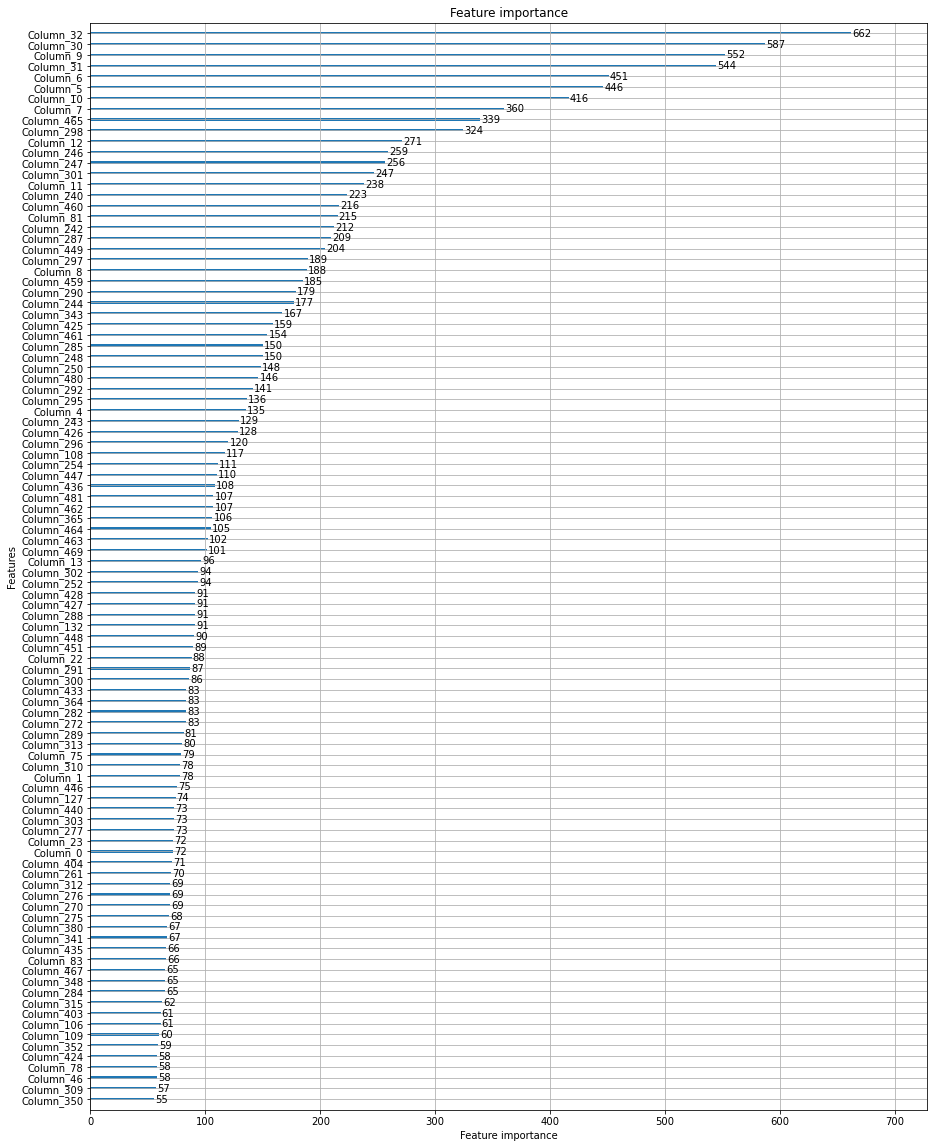

In [93]:
#plotting important features
lgb.plot_importance(clf,max_num_features=100,figsize=(15,20))

In [94]:
#Creating top 50 features
top_feat=pd.DataFrame(clf.feature_importances_,index=X.columns).sort_values(by=[0],ascending=False).head(50)
top_feat.index

Index(['EXT_SOURCE_3', 'EXT_SOURCE_1', 'DAYS_BIRTH', 'EXT_SOURCE_2',
       'AMT_ANNUITY', 'AMT_CREDIT', 'DAYS_EMPLOYED', 'AMT_GOODS_PRICE',
       'i_AMT_PAYMENT', 'p_CNT_PAYMENT', 'DAYS_ID_PUBLISH', 'b_AMT_CREDIT_SUM',
       'b_AMT_CREDIT_SUM_DEBT', 'p_DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_REGISTRATION', 'b_DAYS_CREDIT', 'i_NUM_INSTALMENT_VERSION',
       'DAYS_LAST_PHONE_CHANGE', 'b_DAYS_CREDIT_ENDDATE', 'p_AMT_ANNUITY',
       'CNT_INSTALMENT_FUTURE', 'p_SELLERPLACE_AREA',
       'REGION_POPULATION_RELATIVE', 'i_SK_ID_PREV', 'p_AMT_DOWN_PAYMENT',
       'b_AMT_CREDIT_MAX_OVERDUE', 'p_NAME_CONTRACT_STATUS_Refused',
       'p_NAME_YIELD_GROUP_high', 'i_NUM_INSTALMENT_NUMBER',
       'b_AMT_CREDIT_SUM_LIMIT', 'b_br_full_count', 'b_DAYS_CREDIT_UPDATE',
       'ccb_CNT_DRAWINGS_ATM_CURRENT', 'p_HOUR_APPR_PROCESS_START',
       'p_RATE_DOWN_PAYMENT', 'AMT_INCOME_TOTAL', 'b_DAYS_ENDDATE_FACT',
       'p_NAME_YIELD_GROUP_low_action', 'p_DAYS_DECISION', 'CODE_GENDER_F',
       'b_CREDIT

In [95]:
#selcting the important features from data 
top_features=X[top_feat.index]
top_features

,EXT_SOURCE_3,EXT_SOURCE_1,DAYS_BIRTH,EXT_SOURCE_2,AMT_ANNUITY,AMT_CREDIT,DAYS_EMPLOYED,AMT_GOODS_PRICE,i_AMT_PAYMENT,p_CNT_PAYMENT,...,b_CREDIT_ACTIVE_Closed,MONTHS_BALANCE,p_PRODUCT_COMBINATION_Cash X-Sell: low,ccb_CNT_DRAWINGS_CURRENT,i_DAYS_INSTALMENT,p_NAME_CLIENT_TYPE_New,i_AMT_INSTALMENT,i_DAYS_ENTRY_PAYMENT,ccb_AMT_CREDIT_LIMIT_ACTUAL,OWN_CAR_AGE
0,0.139376,0.083037,-9461,0.262949,24700.5,406597.5,-637.0,351000.0,11559.247105,24.000000,...,0.750000,-13.000000,0.000000,0.0,-295.000000,1.000000,11559.247105,-315.421053,0.0,0.0
1,0.000000,0.311267,-16765,0.622246,35698.5,1293502.5,-1188.0,1129500.0,64754.586000,10.000000,...,0.750000,-44.500000,0.333333,0.0,-1378.160000,0.000000,64754.586000,-1385.320000,0.0,0.0
2,0.729567,0.000000,-19046,0.555912,6750.0,135000.0,-225.0,135000.0,7096.155000,4.000000,...,1.000000,0.000000,0.000000,0.0,-754.000000,1.000000,7096.155000,-761.666667,0.0,26.0
3,0.000000,0.000000,-19005,0.650442,29686.5,312682.5,-3039.0,297000.0,62947.088438,23.000000,...,0.000000,0.000000,0.222222,0.0,-252.250000,0.111111,62947.088438,-271.625000,270000.0,0.0
4,0.000000,0.000000,-19932,0.322738,21865.5,513000.0,-3038.0,513000.0,12214.060227,20.666667,...,1.000000,-31.166667,0.000000,0.0,-1028.606061,0.166667,12666.444545,-1032.242424,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.000000,0.145570,-9327,0.681632,27558.0,254700.0,-236.0,225000.0,7492.924286,8.000000,...,0.000000,0.000000,0.000000,0.0,-120.000000,1.000000,7492.924286,-156.285714,0.0,0.0
307507,0.000000,0.000000,-20775,0.115992,12001.5,269550.0,0.0,225000.0,10069.867500,6.000000,...,0.000000,0.000000,0.000000,0.0,-2391.000000,1.000000,10069.867500,-2393.833333,0.0,0.0
307508,0.218859,0.744026,-14966,0.535722,29979.0,677664.0,-7921.0,585000.0,4115.915357,5.000000,...,0.500000,-59.000000,0.000000,0.0,-2372.928571,0.000000,4399.707857,-2387.428571,0.0,0.0
307509,0.661024,0.000000,-11961,0.514163,20205.0,370107.0,-4786.0,319500.0,10239.832895,15.000000,...,1.000000,0.000000,0.000000,0.0,-142.263158,0.500000,10239.832895,-161.263158,0.0,0.0


In [96]:
#scaling by Standard scaler 
Scaled_x=Scaler.fit_transform(top_features)


In [97]:
#because of huge number of features, we are using PCA to reduce dimension of the data(importing PCA)
from sklearn.decomposition import PCA
pca=PCA(n_components=200) 

In [98]:
#fitting and transforming the data to reduce dimensions into 100
X_pca=pca.fit_transform(Scaled_X)

In [99]:
#checking shape after PCA
X_pca.shape

(307511, 200)

Text(0, 0.5, 'cumulative explained variance')

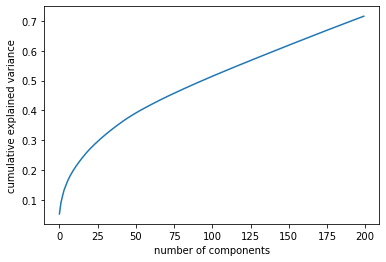

In [100]:
#choosing effective number of features to gather more data
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

By looking at above graph we can say that PCA requires more data to describe the complete data, So we will use feature importance

In [101]:
#defining training and testing data using train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Scaled_x, y, test_size=0.2, random_state=42)

In [102]:
#initializing the Light gradient boosting algorithm, since the data is huge and imbalanced better to choose boosting algorithm
clf = lgb.LGBMClassifier(boosting_type='gbdt',objective='binary',max_depth=8, learning_rate=0.03, n_estimators= 1000,
                 class_weight='balanced', subsample=0.9, colsample_bytree= 0.8,)

In [103]:
#training the defined model 
clf.fit(X_train,y_train, 
                eval_set= [(X_train,y_train),(X_test, y_test)],eval_metric='auc',
                early_stopping_rounds=100,verbose = 200)

Training until validation scores don't improve for 100 rounds
[200]	training's auc: 0.794045	training's binary_logloss: 0.555792	valid_1's auc: 0.766274	valid_1's binary_logloss: 0.565355
[400]	training's auc: 0.817755	training's binary_logloss: 0.529215	valid_1's auc: 0.771862	valid_1's binary_logloss: 0.546866
[600]	training's auc: 0.836079	training's binary_logloss: 0.509819	valid_1's auc: 0.772455	valid_1's binary_logloss: 0.534835
[800]	training's auc: 0.852009	training's binary_logloss: 0.492343	valid_1's auc: 0.772773	valid_1's binary_logloss: 0.524056
[1000]	training's auc: 0.866306	training's binary_logloss: 0.476299	valid_1's auc: 0.772937	valid_1's binary_logloss: 0.513915
Did not meet early stopping. Best iteration is:
[1000]	training's auc: 0.866306	training's binary_logloss: 0.476299	valid_1's auc: 0.772937	valid_1's binary_logloss: 0.513915


LGBMClassifier(class_weight='balanced', colsample_bytree=0.8,
               learning_rate=0.03, max_depth=8, n_estimators=1000,
               objective='binary', subsample=0.9)

In [104]:
#import logistic Regression 
from sklearn.linear_model import LogisticRegression

In [105]:
#initialising logistic model
clf1=LogisticRegression()

In [106]:
#training logistic model
clf1.fit(X_train,y_train)

LogisticRegression()

In [107]:
#predicting probabilities of outcomes
pred_prob=clf.predict_proba(X_test)
pred_prob1=clf1.predict_proba(X_test)

In [108]:
#predicting the classes
pred=clf.predict(X_test)
pred1=clf1.predict(X_test)


## Performance Metrics

In [109]:
#importing metrics to check goodness of our model(importing metrics)
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [110]:
#confusion metrix for each model
print('Confusion metrix for LGBM\n',
      confusion_matrix(y_test,pred))
print('Confusion metrix for Logistic \n',
      confusion_matrix(y_test,pred1))

Confusion metrix for LGBM
 [[42728 13826]
 [ 1752  3197]]
Confusion metrix for Logistic 
 [[56498    56]
 [ 4899    50]]


Here, we can see that Logistic Model is failed to predict Defaulters classification, But, In our Case we are more intrested in 
Defaulters classification. So LGBM is more better than Logistic here.

#### Since the data available to us is an Imbalanced Dataset, we cannot simply use Accuracy as a metric for evaluating the performance of the model. There are some metrics that work well with imbalanced datasets, of which we will use the below-mentioned metrics.

In [111]:
#printing Precision score for trained model (True Positive rate)
print(precision_score(y_test,pred))
print(precision_score(y_test,pred1))

0.18780473477060447
0.4716981132075472


In [112]:
#printing Recall score for trained model
print(recall_score(y_test,pred))
print(recall_score(y_test,pred1))

0.6459890887047889
0.010103051121438675


We want more Recall Score even though precision score is less, This is because we care more about minimizing the False Negatives, i.e. the people who were predicted as Non-Defaulters by the model but were actually Defaulters. We do not want to miss out on any Defaulter as being classified as Non-Defaulter 

In [113]:
#printing F1 score for trained model
print(f1_score(y_test,pred))
print(f1_score(y_test,pred1))

0.2910067358456217
0.019782393669634024


In [114]:
#importing scikitplot for ROC
import scikitplot as sktplt

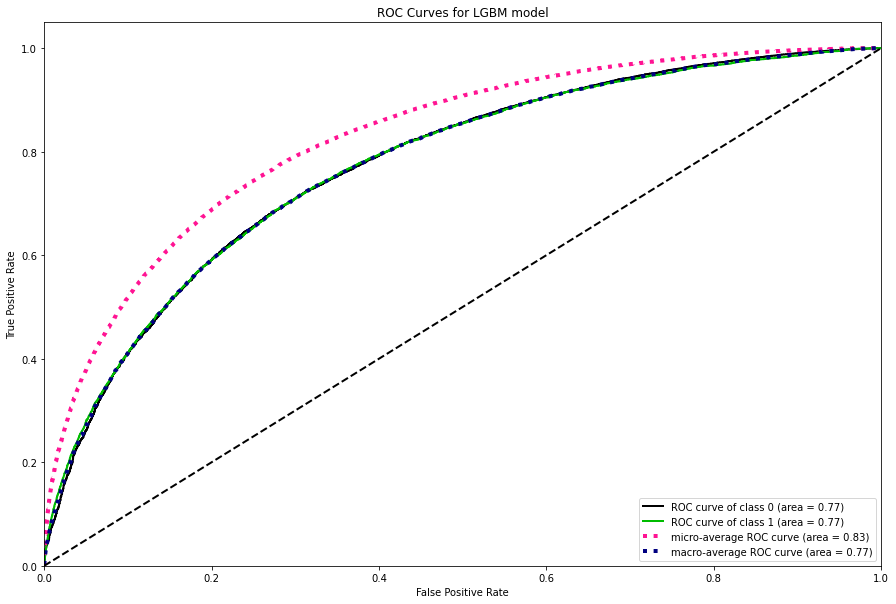

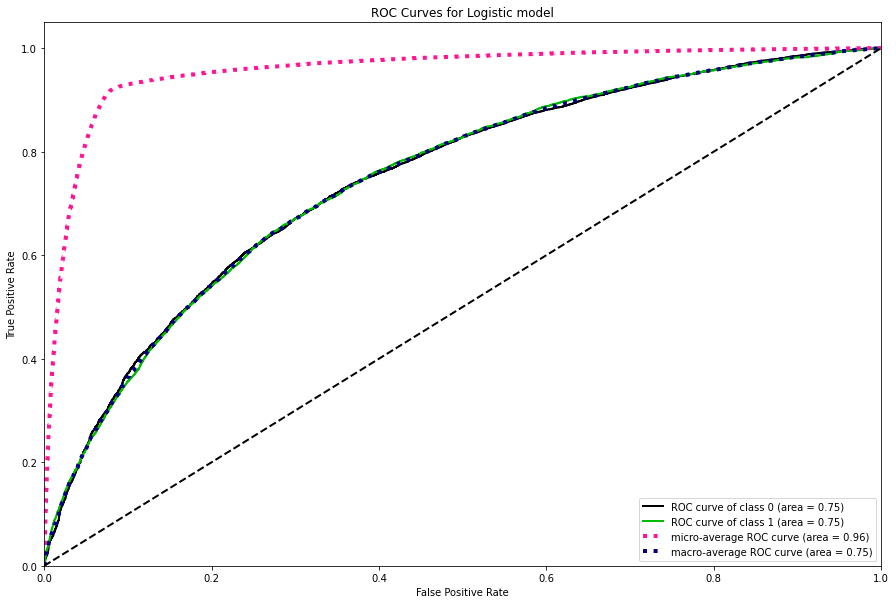

In [115]:
#plotting ROC curve to check AUC

sktplt.metrics.plot_roc_curve(y_test,pred_prob,figsize=(15,10),title='ROC Curves for LGBM model')

sktplt.metrics.plot_roc_curve(y_test,pred_prob1,figsize=(15,10),title='ROC Curves for Logistic model')
plt.show()

From above ROC plot, looking at AUC values we can say that LGBM model is good at performace of classification.

## Conclusion:
    By Analysing the data and building LGBM and Logistic Model,Considering Recall Score and AUC We came to know that LGBM is giving better results.
    